# Librerias

In [129]:
import pandas as pd
import numpy as np # manipulacion de vectores https://numpy.org/
import matplotlib.pyplot as plt # crear graficos https://matplotlib.org/
import seaborn as sns # para crear graficos parecido a ggplot2 de R  https://seaborn.pydata.org/examples/index.html

#mutual information
from sklearn.feature_selection import mutual_info_classif

#Filtro multivariado - mejor modelo de regresión según el BIC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# calculo de regresion logistico mas estadistico tipo R con statsmodels
import statsmodels.api as sm 

# # Calculamos el modelo con el RFE con el numero de variables seleccionadas
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# #Filtro multivariado según RFE con random forest y SVM
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

#Filtro multivariado BORUTA
from boruta import BorutaPy
from sklearn.preprocessing import StandardScaler

#partición de los datos
from sklearn.model_selection import train_test_split 

#algoritmos basicos
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score

#algoritmos basicos estandarizados
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet

#algoritmos avanzados 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Lectura de datos

In [3]:
misdatos = pd.read_csv('../dataset/house_price_madrid_14_08_2022.csv')
misdatos.shape

(15975, 9)

In [4]:
misdatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15975 entries, 0 to 15974
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         15975 non-null  int64  
 1   house_type    15975 non-null  object 
 2   house_type_2  15506 non-null  object 
 3   rooms         15975 non-null  int64  
 4   m2            15975 non-null  float64
 5   elevator      15975 non-null  bool   
 6   garage        15975 non-null  bool   
 7   neighborhood  15975 non-null  object 
 8   district      15975 non-null  object 
dtypes: bool(2), float64(1), int64(2), object(4)
memory usage: 905.0+ KB


In [5]:
# Mirar los valores perdidos o nans:
# Identificamos el número de missing values en cada columna
misdatos.isnull().sum()

price             0
house_type        0
house_type_2    469
rooms             0
m2                0
elevator          0
garage            0
neighborhood      0
district          0
dtype: int64

In [6]:
misdatos.head()

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district
0,495000,planta 1,exterior,3,118.0,True,True,Chopera,Arganzuela
1,485000,planta 2,exterior,2,82.0,True,True,Palos de Moguer,Arganzuela
2,315000,planta 2,exterior,2,72.0,False,False,Legazpi,Arganzuela
3,585000,planta 4,exterior,2,174.0,True,True,Palos de Moguer,Arganzuela
4,255000,bajo,exterior,3,75.0,False,False,Acacias,Arganzuela


# Limpieza de datos

In [7]:
data = misdatos.copy()
data.shape

(15975, 9)

In [8]:
data.columns

Index(['price', 'house_type', 'house_type_2', 'rooms', 'm2', 'elevator',
       'garage', 'neighborhood', 'district'],
      dtype='object')

In [9]:
# renombrar las columnas del dataframe
data.rename(columns = {'price':'precio', 'house_type':'tipo',
                       'house_type_2':'vistas', 'rooms':'habitaciones',
                       'm2':'metros', 'elevator':'ascensor',
                       'neighborhood':'titulo', 'district':'distrito'                                                                          
                      }, inplace = True)
data.columns

Index(['precio', 'tipo', 'vistas', 'habitaciones', 'metros', 'ascensor',
       'garage', 'titulo', 'distrito'],
      dtype='object')

## Variables

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15975 entries, 0 to 15974
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   precio        15975 non-null  int64  
 1   tipo          15975 non-null  object 
 2   vistas        15506 non-null  object 
 3   habitaciones  15975 non-null  int64  
 4   metros        15975 non-null  float64
 5   ascensor      15975 non-null  bool   
 6   garage        15975 non-null  bool   
 7   titulo        15975 non-null  object 
 8   distrito      15975 non-null  object 
dtypes: bool(2), float64(1), int64(2), object(4)
memory usage: 905.0+ KB


### precio

In [11]:
data['precio'].value_counts()

165000    126
450000    124
950000    115
175000    112
150000    107
         ... 
561000      1
989500      1
171937      1
319782      1
69697       1
Name: precio, Length: 2001, dtype: int64

In [12]:
# comprobar caracteres extraños 
lista = data['precio'].value_counts() 
# convertir a lista
lista = lista.index.values.tolist() 
# ordenar la lista
#lista.sort(reverse=True) #ascendente
lista.sort(reverse=False) #descendente
# mostrar la lista
lista

[725,
 47500,
 53800,
 55000,
 55100,
 56000,
 58000,
 61800,
 62000,
 62500,
 62600,
 65000,
 66000,
 68000,
 69000,
 69500,
 69697,
 69900,
 69999,
 70000,
 72000,
 73000,
 75000,
 75630,
 76000,
 76500,
 76990,
 77000,
 77500,
 77900,
 78000,
 78500,
 78900,
 79000,
 79600,
 79800,
 79900,
 79990,
 80000,
 80500,
 81000,
 81400,
 82000,
 82500,
 83000,
 83046,
 84150,
 84700,
 85000,
 85300,
 86000,
 86500,
 86700,
 87260,
 88000,
 89000,
 89500,
 89900,
 89990,
 90000,
 90700,
 91000,
 91500,
 92000,
 92260,
 92400,
 92500,
 93000,
 94000,
 94990,
 95000,
 95500,
 95619,
 95900,
 96000,
 97000,
 97100,
 97500,
 97800,
 97999,
 98000,
 98229,
 98500,
 98700,
 99000,
 99100,
 99123,
 99500,
 99705,
 99900,
 99999,
 100000,
 100500,
 101000,
 102000,
 102260,
 102500,
 102800,
 103000,
 103200,
 103400,
 104000,
 104600,
 104900,
 104999,
 105000,
 105500,
 105600,
 106000,
 106050,
 106800,
 107000,
 107100,
 107500,
 107999,
 108000,
 108420,
 108500,
 109000,
 109400,
 109500,
 109

In [13]:
print(data.loc[data['precio'] == 725])

       precio      tipo    vistas  habitaciones  metros  ascensor  garage  \
10002     725  planta 3  exterior             1    60.0      True   False   

             titulo distrito  
10002  Los Cármenes   latina  


In [14]:
#sustituir el valor 725 por 72500
data['precio'] = data['precio'].replace(to_replace=725, value=72500)

### tipo

In [15]:
data['tipo'].value_counts()

planta 1       3295
planta 2       2804
planta 3       2465
bajo           2016
planta 4       1705
planta 5       1084
planta 6        662
chalet          409
planta 7        394
entreplanta     261
planta 8        208
planta 9        154
casa            137
planta 10        78
semi-sotano      76
planta 11        48
planta 13        39
planta 12        37
sotano           31
planta -1        20
planta 14        18
planta 15        13
planta 19         6
planta 18         5
planta 16         5
planta 20         5
Name: tipo, dtype: int64

### vistas

In [16]:
data['vistas'].value_counts()

exterior    13821
interior     1685
Name: vistas, dtype: int64

In [17]:
#identificar valores nulos
data['vistas'].isnull().sum()

469

In [18]:
#sustituir valores nulos por el valor 'interior'
data["vistas"].fillna("interior", inplace = True)

In [19]:
data['vistas'].value_counts()

exterior    13821
interior     2154
Name: vistas, dtype: int64

### habitaciones

In [20]:
data['habitaciones'] = data['habitaciones'].astype('object')

In [21]:
data['habitaciones'].value_counts()

3     5489
2     4610
4     2350
1     2076
5      902
6      301
7      131
8       58
9       32
10       9
11       5
14       3
16       3
12       2
13       1
15       1
17       1
41       1
Name: habitaciones, dtype: int64

### metros

In [22]:
data['metros'].value_counts()

60.00     382
65.00     330
75.00     291
80.00     282
70.00     280
         ... 
511.00      1
860.00      1
1.30        1
341.00      1
1.38        1
Name: metros, Length: 585, dtype: int64

In [23]:
# comprobar caracteres extraños 
lista = data['metros'].value_counts() 
# convertir a lista
lista = lista.index.values.tolist() 
# ordenar la lista
lista.sort()
# mostrar la lista
lista

[1.0,
 1.016,
 1.021,
 1.045,
 1.055,
 1.1,
 1.116,
 1.129,
 1.15,
 1.186,
 1.2,
 1.242,
 1.245,
 1.246,
 1.283,
 1.3,
 1.308,
 1.311,
 1.32,
 1.33,
 1.35,
 1.38,
 1.5,
 1.76,
 2.314,
 2.4,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 1

In [24]:
#reemplazar valores extraños
data['metros'] = data['metros'].replace(to_replace=1, value=1000)
data['metros'] = data['metros'].replace(to_replace=1.016, value=1016)
data['metros'] = data['metros'].replace(to_replace=1.021, value=1021)
data['metros'] = data['metros'].replace(to_replace=1.045, value=1045)
data['metros'] = data['metros'].replace(to_replace=1.055, value=1055)
data['metros'] = data['metros'].replace(to_replace=1.1, value=1100)
data['metros'] = data['metros'].replace(to_replace=1.116, value=1116)
data['metros'] = data['metros'].replace(to_replace=1.129, value=1129)
data['metros'] = data['metros'].replace(to_replace=1.15, value=1150)
data['metros'] = data['metros'].replace(to_replace=1.186, value=1186)
data['metros'] = data['metros'].replace(to_replace=1.2, value=1200)
data['metros'] = data['metros'].replace(to_replace=1.242, value=1242)
data['metros'] = data['metros'].replace(to_replace=1.245, value=1245)
data['metros'] = data['metros'].replace(to_replace=1.246, value=1246)
data['metros'] = data['metros'].replace(to_replace=1.283, value=1283)
data['metros'] = data['metros'].replace(to_replace=1.3, value=1300)
data['metros'] = data['metros'].replace(to_replace=1.308, value=1308)
data['metros'] = data['metros'].replace(to_replace=1.311, value=1311)
data['metros'] = data['metros'].replace(to_replace=1.32, value=1320)
data['metros'] = data['metros'].replace(to_replace=1.33, value=1330)
data['metros'] = data['metros'].replace(to_replace=1.35, value=1350)
data['metros'] = data['metros'].replace(to_replace=1.38, value=1380)
data['metros'] = data['metros'].replace(to_replace=1.5, value=1500)
data['metros'] = data['metros'].replace(to_replace=1.76, value=1760)
data['metros'] = data['metros'].replace(to_replace=2.314, value=2314)
data['metros'] = data['metros'].replace(to_replace=2.4, value=2400)

In [25]:
data['metros'] = data['metros'].astype('object')

### ascensor

In [26]:
data['ascensor'].value_counts()

True     11378
False     4597
Name: ascensor, dtype: int64

### garage

In [27]:
data['garage'].value_counts()

False    11528
True      4447
Name: garage, dtype: int64

### titulo

In [28]:
data['titulo'].value_counts()

Goya                                              491
Recoletos                                         369
Castellana                                        311
Lista                                             275
Pueblo Nuevo                                      270
                                                 ... 
Chalet en Aravaca                                   1
Chalet en Ciudad Universitaria                      1
Ático en Ciudad Universitaria                       1
Chalet pareado en Fuentelarreina                    1
Casa o chalet independiente en Villaverde Alto      1
Name: titulo, Length: 341, dtype: int64

### distrito

In [29]:
data['distrito'].value_counts()

barrio de salamanca    1820
chamberi               1124
ciudad lineal          1109
tetuan                 1097
centro                 1085
chamartin              1085
carabanchel            1076
puente-de-vallecas      785
hortaleza               736
latina                  726
fuencarral              721
moncloa                 712
san-blas                668
Arganzuela              623
retiro                  606
usera                   493
villaverde              487
villa-de-vallecas       356
vicalvaro               281
moratalaz               200
barajas                 185
Name: distrito, dtype: int64

# Exploración de las variables

## Exploración univariada

### Variable de salida

In [30]:
# Identificar variable respuesta
respuesta = np.array(['precio'])
respuesta

array(['precio'], dtype='<U6')

In [31]:
# Estadístico descriptivos:

# Medidas de centralidad: Media y mediana
media = data[respuesta].mean()
mediana = data[respuesta].median()
maximo = data[respuesta].max()
minimo = data[respuesta].min()
Estadisticos_descriptivos = pd.DataFrame({'Media': media, 'Mediana': mediana, 'Maximo': maximo, 'Minimo': minimo})


# Medidas de dispersión: desviación estándar y rango intercuartílico (IQR)
desv = data[respuesta].std()
q1 = data[respuesta].quantile(0.25)
q3 = data[respuesta].quantile(0.75)
iqr = q3-q1
Estadisticos_descriptivos['Desviación Estándar'] = desv
Estadisticos_descriptivos['Cuartil 1'] = q1
Estadisticos_descriptivos['Cuartil 3'] = q3
Estadisticos_descriptivos['IQR'] = iqr

# Error estándar y intervalos de confianza de la media al 95% y 99%
Estadisticos_descriptivos['n'] = len(data) # numero de observaciones
Estadisticos_descriptivos['Error Estandar'] = desv/np.sqrt(len(data)) # numero de observaciones
Estadisticos_descriptivos['IC lower 95%'] = media-1.96*Estadisticos_descriptivos['Error Estandar'] 
Estadisticos_descriptivos['IC upper 95%'] = media+1.96*Estadisticos_descriptivos['Error Estandar']
Estadisticos_descriptivos['IC lower 95%'] = media-1.96*Estadisticos_descriptivos['Error Estandar']
Estadisticos_descriptivos['IC upper 95%'] = media+1.96*Estadisticos_descriptivos['Error Estandar']

Estadisticos_descriptivos

,Media,Mediana,Maximo,Minimo,Desviación Estándar,Cuartil 1,Cuartil 3,IQR,n,Error Estandar,IC lower 95%,IC upper 95%
precio,624237.200063,359973.0,13950000,47500,770903.966471,195000.0,749000.0,554000.0,15975,6099.297918,612282.576144,636191.823981


*************************************************
Variable = precio
*************************************************
        Frecuencias Relativas  Frecuencias Absolutas
165000               0.007887                    126
450000               0.007762                    124
950000               0.007199                    115
175000               0.007011                    112
150000               0.006698                    107
...                       ...                    ...
561000               0.000063                      1
989500               0.000063                      1
171937               0.000063                      1
319782               0.000063                      1
69697                0.000063                      1

[2001 rows x 2 columns]


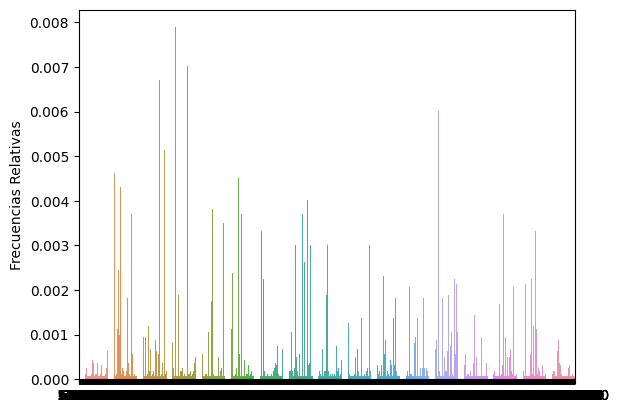

In [32]:
i = respuesta[0]
print("*************************************************")
print("Variable = "+i)
print("*************************************************")
# 1. La tabla de frecuencias de la variable i
pct = pd.DataFrame(data[i].value_counts(normalize=True))
pct.columns = ['Frecuencias Relativas']
pct["Frecuencias Absolutas"] = data[i].value_counts()
print(pct)

# 2. Barplot de la variable i
sns.barplot(x=pct.index, y='Frecuencias Relativas', data=pct)
plt.show()

# # 3. Pieplot de la variable i
# frec_abs = data[i].value_counts() # grabo las frecuencias absolutas
# labels = data[i].value_counts().index # cojo los nombres de los grupos de variable cualitativa i 
# colors = sns.color_palette('pastel')[0:len(labels)] # defino los colors según la paleta pastel de seaborn
# plt.pie(frec_abs, labels = labels, colors = colors, autopct='%.0f%%') # pie plot y muestro los porcentajes
# plt.show()

### Explorar todas las variables cuantitativas y sus correlaciones

In [33]:
# Identificar variables explicativas cuantitativas excepto la respuesta
tipos_variables = pd.DataFrame(data.drop(respuesta[0], axis=1).dtypes)
(tipos_variables[0]=='int64') | (tipos_variables[0]=='float64')

tipo            False
vistas          False
habitaciones    False
metros          False
ascensor        False
garage          False
titulo          False
distrito        False
Name: 0, dtype: bool

In [34]:
# Identificar las variables cuantitativas. Juntamos los dos pasos anteriores:
var_num = data.drop(respuesta[0], axis=1).columns[(tipos_variables[0]=='int64') |
                                                        (tipos_variables[0]=='float64')]
pd.DataFrame(var_num)

,0


### Explorar todas las variables cualitativas

In [35]:
# Identificar variables explicativas cualitativas excepto la respuesta
tipos_variables = pd.DataFrame(data.drop(respuesta[0], axis=1).dtypes)
tipos_variables[0]=='object'

tipo             True
vistas           True
habitaciones     True
metros           True
ascensor        False
garage          False
titulo           True
distrito         True
Name: 0, dtype: bool

In [36]:
# Identificar las variables cualitativas. Juntamos los dos pasos anteriores:
var_cual = data.drop(respuesta[0], axis=1).columns[tipos_variables[0]=='object']
pd.DataFrame(var_cual)

,0
0,tipo
1,vistas
2,habitaciones
3,metros
4,titulo
5,distrito


In [37]:
#eliminar la variable titulo (NO APORTA INFORMACION)
var_cual = var_cual.drop('titulo')
var_cual

Index(['tipo', 'vistas', 'habitaciones', 'metros', 'distrito'], dtype='object')

*************************************************
Variable = tipo
*************************************************
             Frecuencias Relativas  Frecuencias Absolutas
planta 1                  0.206260                   3295
planta 2                  0.175524                   2804
planta 3                  0.154304                   2465
bajo                      0.126197                   2016
planta 4                  0.106729                   1705
planta 5                  0.067856                   1084
planta 6                  0.041440                    662
chalet                    0.025603                    409
planta 7                  0.024664                    394
entreplanta               0.016338                    261
planta 8                  0.013020                    208
planta 9                  0.009640                    154
casa                      0.008576                    137
planta 10                 0.004883                     78
semi-sotano   

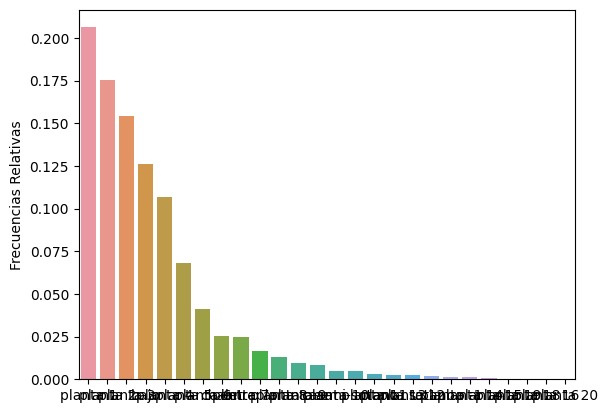

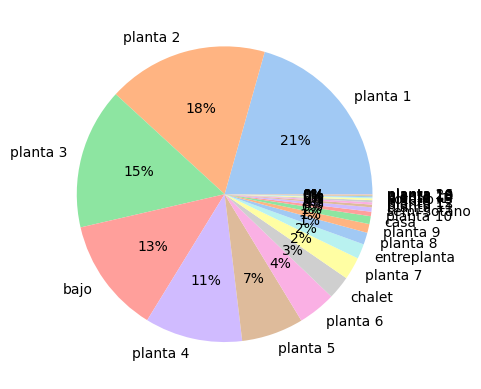

*************************************************
*************************************************
*************************************************
Variable = vistas
*************************************************
          Frecuencias Relativas  Frecuencias Absolutas
exterior               0.865164                  13821
interior               0.134836                   2154


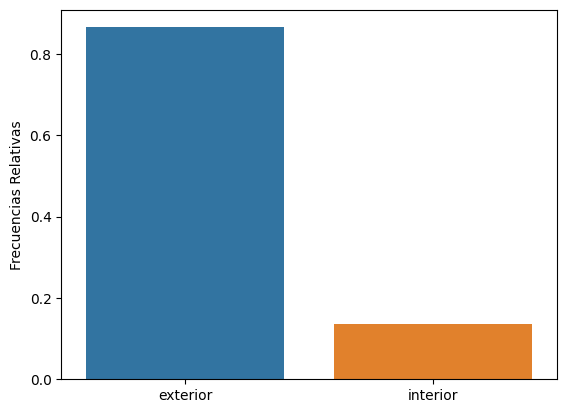

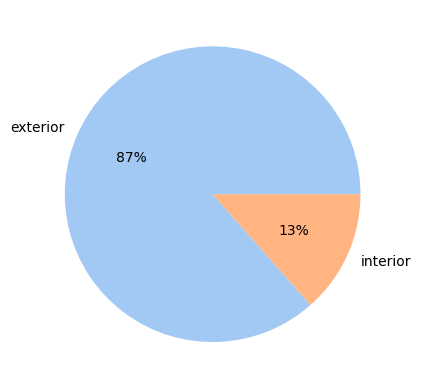

*************************************************
*************************************************
*************************************************
Variable = habitaciones
*************************************************
    Frecuencias Relativas  Frecuencias Absolutas
3                0.343599                   5489
2                0.288576                   4610
4                0.147105                   2350
1                0.129953                   2076
5                0.056463                    902
6                0.018842                    301
7                0.008200                    131
8                0.003631                     58
9                0.002003                     32
10               0.000563                      9
11               0.000313                      5
14               0.000188                      3
16               0.000188                      3
12               0.000125                      2
13               0.000063                

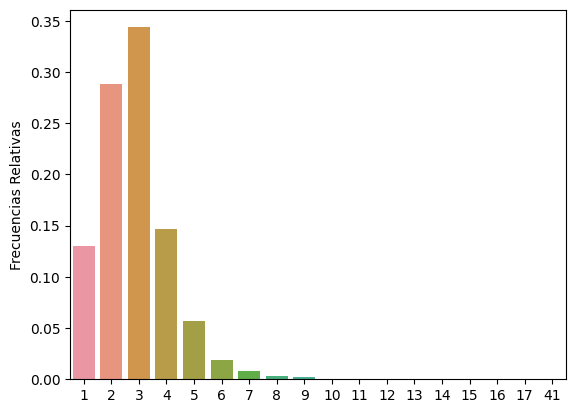

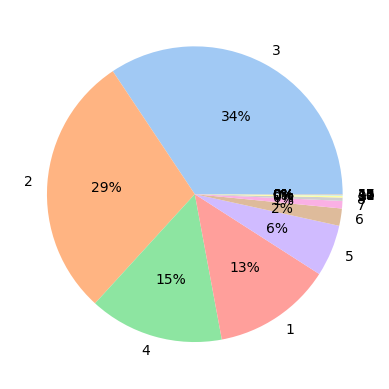

*************************************************
*************************************************
*************************************************
Variable = metros
*************************************************
        Frecuencias Relativas  Frecuencias Absolutas
60.0                 0.023912                    382
65.0                 0.020657                    330
75.0                 0.018216                    291
80.0                 0.017653                    282
70.0                 0.017527                    280
...                       ...                    ...
511.0                0.000063                      1
860.0                0.000063                      1
1300.0               0.000063                      1
341.0                0.000063                      1
1380.0               0.000063                      1

[585 rows x 2 columns]


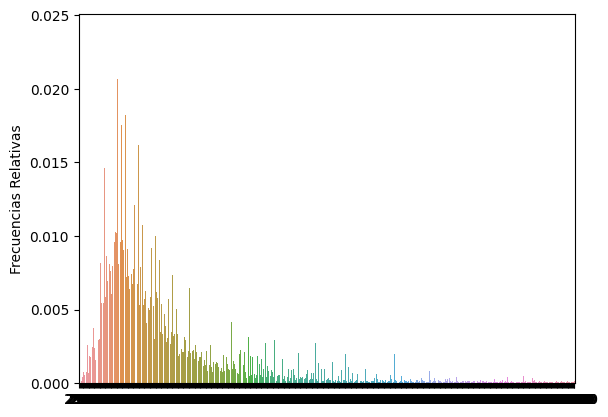

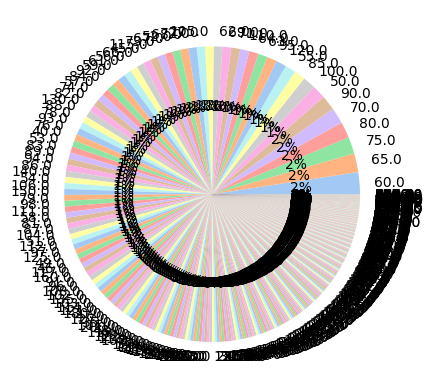

*************************************************
*************************************************
*************************************************
Variable = distrito
*************************************************
                     Frecuencias Relativas  Frecuencias Absolutas
barrio de salamanca               0.113928                   1820
chamberi                          0.070360                   1124
ciudad lineal                     0.069421                   1109
tetuan                            0.068670                   1097
centro                            0.067919                   1085
chamartin                         0.067919                   1085
carabanchel                       0.067355                   1076
puente-de-vallecas                0.049139                    785
hortaleza                         0.046072                    736
latina                            0.045446                    726
fuencarral                        0.045133            

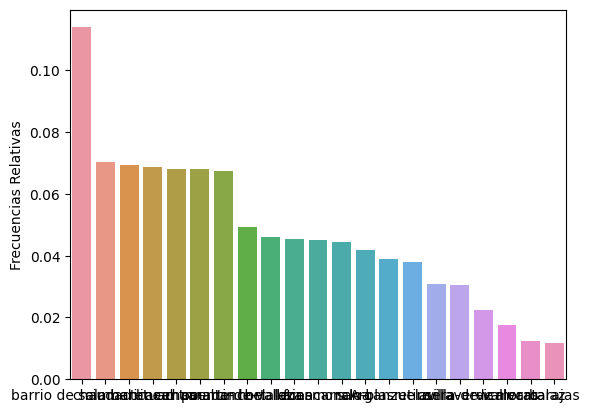

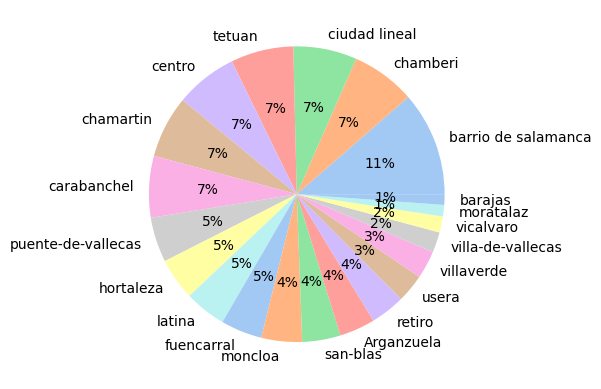

*************************************************
*************************************************


In [38]:
# gráficos y tablas de frecuencias de todas las variables cualitativas:
for i in var_cual:
    
    print("*************************************************")
    print("Variable = "+i)
    print("*************************************************")
    
    # 1. La tabla de frecuencias de la variable i
    pct = pd.DataFrame(data[i].value_counts(normalize=True))
    pct.columns = ['Frecuencias Relativas']
    pct["Frecuencias Absolutas"] = data[i].value_counts()
    print(pct)
    
    # 2. Barplot de la variable i
    sns.barplot(x=pct.index, y='Frecuencias Relativas', data=pct)
    plt.show()
    
    # 3. Pieplot de la variable i
    frec_abs = data[i].value_counts() # grabo las frecuencias absolutas
    labels = data[i].value_counts().index # cojo los nombres de los grupos de variable cualitativa i 
    colors = sns.color_palette('pastel')[0:len(labels)] # defino los colors según la paleta pastel de seaborn
    plt.pie(frec_abs, labels = labels, colors = colors, autopct='%.0f%%') # pie plot y muestro los porcentajes
    plt.show()
    
    print("*************************************************")
    print("*************************************************")

# Selección de datos de entrada y de salida

## Reemplazar valores objecto a INT

In [39]:
#copiar el data original
X_tot = data.copy()
# obtener todas las variables de entrada sin la salida
X_tot = data.drop(respuesta[0], axis=1) 
# eliminar algunas variables de entrada
del(X_tot['titulo'])

X_tot.dtypes

tipo            object
vistas          object
habitaciones    object
metros          object
ascensor          bool
garage            bool
distrito        object
dtype: object

In [40]:
# variable de salida, el precio de la vivienda
y = data[respuesta[0]] 
y

0        495000
1        485000
2        315000
3        585000
4        255000
          ...  
15970    155000
15971    108000
15972    140000
15973    135000
15974    150000
Name: precio, Length: 15975, dtype: int64

### tipo

In [41]:
#obtener una lista con los valores de los "tipos"
lista_tipo = X_tot['tipo'].value_counts() 
lista_tipo = lista_tipo.index.values.tolist() 
lista_tipo.sort()
lista_tipo

['bajo',
 'casa',
 'chalet',
 'entreplanta',
 'planta -1',
 'planta 1',
 'planta 10',
 'planta 11',
 'planta 12',
 'planta 13',
 'planta 14',
 'planta 15',
 'planta 16',
 'planta 18',
 'planta 19',
 'planta 2',
 'planta 20',
 'planta 3',
 'planta 4',
 'planta 5',
 'planta 6',
 'planta 7',
 'planta 8',
 'planta 9',
 'semi-sotano',
 'sotano']

In [42]:
#crear una lista con los valores de los indices
lista_n_tipo = []
for i in range(len(lista_tipo)):
    lista_n_tipo.append(i)

In [43]:
# Creando un diccionario de los valores de los tipos y los valores del indice
dicc_tipo = {lista_tipo:lista_n_tipo for (lista_tipo,lista_n_tipo) in zip(lista_tipo,lista_n_tipo)}
print(dicc_tipo)

{'bajo': 0, 'casa': 1, 'chalet': 2, 'entreplanta': 3, 'planta -1': 4, 'planta 1': 5, 'planta 10': 6, 'planta 11': 7, 'planta 12': 8, 'planta 13': 9, 'planta 14': 10, 'planta 15': 11, 'planta 16': 12, 'planta 18': 13, 'planta 19': 14, 'planta 2': 15, 'planta 20': 16, 'planta 3': 17, 'planta 4': 18, 'planta 5': 19, 'planta 6': 20, 'planta 7': 21, 'planta 8': 22, 'planta 9': 23, 'semi-sotano': 24, 'sotano': 25}


In [44]:
#reemplazar los valores en el DF de los tipos por el indice (para que sea numerico)
X_tot['tipo'].replace(dicc_tipo, inplace=True)
X_tot['tipo'].value_counts()

5     3295
15    2804
17    2465
0     2016
18    1705
19    1084
20     662
2      409
21     394
3      261
22     208
23     154
1      137
6       78
24      76
7       48
9       39
8       37
25      31
4       20
10      18
11      13
14       6
13       5
12       5
16       5
Name: tipo, dtype: int64

### vistas

In [45]:
X_tot['vistas'].value_counts()

exterior    13821
interior     2154
Name: vistas, dtype: int64

In [46]:
#reemplazar los valores
X_tot['vistas'] = X_tot['vistas'].replace({'exterior': 1})
X_tot['vistas'] = X_tot['vistas'].replace({'interior': 0})
X_tot['vistas'].value_counts()

1    13821
0     2154
Name: vistas, dtype: int64

### habitaciones

In [47]:
#convertir a numerico
X_tot['habitaciones'] = X_tot['habitaciones'].astype('int64')

### metros

In [48]:
#convertir a numerico
X_tot['metros'] = X_tot['metros'].astype('int64')

### ascensor

In [49]:
#convertir a numerico
X_tot['ascensor'] = X_tot['ascensor'].astype('int64')

### garage

In [50]:
#convertir a numerico
X_tot['garage'] = X_tot['garage'].astype('int64')

### distrito

In [51]:
#obtener una lista con los valores de los "tipos"
lista_distrito = X_tot['distrito'].value_counts() 
lista_distrito = lista_distrito.index.values.tolist() 
lista_distrito.sort()
lista_distrito

['Arganzuela',
 'barajas',
 'barrio de salamanca',
 'carabanchel',
 'centro',
 'chamartin',
 'chamberi',
 'ciudad lineal',
 'fuencarral',
 'hortaleza',
 'latina',
 'moncloa',
 'moratalaz',
 'puente-de-vallecas',
 'retiro',
 'san-blas',
 'tetuan',
 'usera',
 'vicalvaro',
 'villa-de-vallecas',
 'villaverde']

In [52]:
#crear una lista con los valores de los indices
lista_n_distrito = []
for i in range(len(lista_distrito)):
    lista_n_distrito.append(i)

In [53]:
# Creando un diccionario de los valores de los distritos y los valores del indice
dicc_distrito = {lista_distrito:lista_n_distrito for (lista_distrito,lista_n_distrito) in zip(lista_distrito,lista_n_distrito)}
print(dicc_distrito)

{'Arganzuela': 0, 'barajas': 1, 'barrio de salamanca': 2, 'carabanchel': 3, 'centro': 4, 'chamartin': 5, 'chamberi': 6, 'ciudad lineal': 7, 'fuencarral': 8, 'hortaleza': 9, 'latina': 10, 'moncloa': 11, 'moratalaz': 12, 'puente-de-vallecas': 13, 'retiro': 14, 'san-blas': 15, 'tetuan': 16, 'usera': 17, 'vicalvaro': 18, 'villa-de-vallecas': 19, 'villaverde': 20}


In [54]:
#reemplazar los valores en el DF de los tipos por el indice (para que sea numerico)
X_tot['distrito'].replace(dicc_distrito, inplace=True)
X_tot['distrito'].value_counts()

2     1820
6     1124
7     1109
16    1097
4     1085
5     1085
3     1076
13     785
9      736
10     726
8      721
11     712
15     668
0      623
14     606
17     493
20     487
19     356
18     281
12     200
1      185
Name: distrito, dtype: int64

# Feature selection-selección de variables

In [55]:
#comprobar los tipos de datos
X_tot.dtypes

tipo            int64
vistas          int64
habitaciones    int64
metros          int64
ascensor        int64
garage          int64
distrito        int64
dtype: object

## Mutual Information

In [56]:
%%time
#from sklearn.feature_selection import mutual_info_classif

a = mutual_info_classif(X_tot,y)
b = X_tot.columns
mutualinfo = pd.DataFrame(a,b,columns =["Mutual_Information"])
mutualinfo.sort_values(by=["Mutual_Information"],ascending = False).head(20)

CPU times: total: 2min 51s
Wall time: 31.2 s


,Mutual_Information
vistas,0.886770
ascensor,0.790134
metros,0.694150
habitaciones,0.649956
tipo,0.482687
distrito,0.425368
garage,0.244454


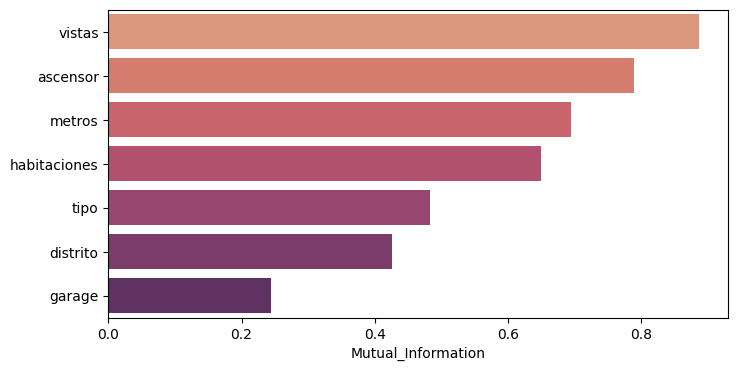

In [57]:
# Plot de la mutual information
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
sns.barplot(x = mutualinfo.sort_values(by=["Mutual_Information"],ascending = False)["Mutual_Information"],
            y = mutualinfo.sort_values(by=["Mutual_Information"],ascending = False).index,
            palette ="flare",
            data=mutualinfo)
plt.show()

## Ranking de Correlación

In [58]:
#crear el DF 
X_num_tot = X_tot.copy()
#añadir la variable de salida al DF
X_num_tot['precio'] = y
X_num_tot.dtypes

tipo            int64
vistas          int64
habitaciones    int64
metros          int64
ascensor        int64
garage          int64
distrito        int64
precio          int64
dtype: object

In [59]:
# Correlacion en valor absoluta de la variable de salida
cor = X_num_tot.corr(method = 'spearman')
cor_target = abs(cor[respuesta])
cor_target = cor_target.sort_values(by = [respuesta[0]], ascending = 0)
cor_target

,precio
precio,1.000000
metros,0.829512
habitaciones,0.520068
ascensor,0.453971
garage,0.336487
distrito,0.333590
tipo,0.174897
vistas,0.144570


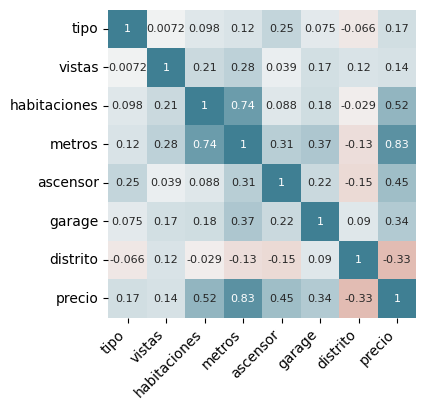

In [60]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(figsize=(4, 4))

sns.heatmap(
    cor,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

## Filtro multivariado - mejor modelo de regresión según el BIC¶

In [61]:
#crear variables
y_ = y
X_ = X_tot

In [62]:
%%time
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression

BIC_models = pd.DataFrame(0, index=range(len(X_.columns)-1), columns = ["Num_Variables","BIC"])
lnreg = LinearRegression()


# Calculo del BIC con la iteracion i-esima
for i in np.arange(1,len(X_.columns),1):
    # Aplicar el RFE con i-variables
    rfe = RFE(lnreg,n_features_to_select = i)
    rfe = rfe.fit(X_,y_)
    print(rfe.support_)
    print(rfe.ranking_)

    # Seleccionar las variables de entrada
    X_RFE = X_[X_.columns[rfe.support_]]
    X_RFE.head()

    # Calcular el modelo logistico con las variables seleccionadas
    lm_model_i = sm.OLS(y_, sm.add_constant(X_RFE)).fit()
    lm_model_i.summary()

    # Calcular el BIC del modelo logistico
    BIC_models.iloc[(i-1)] = [i,lm_model_i.bic]

[False False  True False False False False]
[6 4 1 7 3 2 5]
[False False  True False False  True False]
[5 3 1 6 2 1 4]
[False False  True False  True  True False]
[4 2 1 5 1 1 3]
[False  True  True False  True  True False]
[3 1 1 4 1 1 2]
[False  True  True False  True  True  True]
[2 1 1 3 1 1 1]
[ True  True  True False  True  True  True]
[1 1 1 2 1 1 1]
CPU times: total: 203 ms
Wall time: 229 ms


In [63]:
# BIC de todos los modelos, ordenados por el menor BIC, ya que es el mejor modelo
#BIC_models.sort_values('BIC')
BIC_models.sort_values(by=['BIC'], ascending=True)

,Num_Variables,BIC
4,5,471163.765063
5,6,471170.230617
2,3,472264.193773
3,4,472268.675356
1,2,472602.763663
0,1,473091.861408


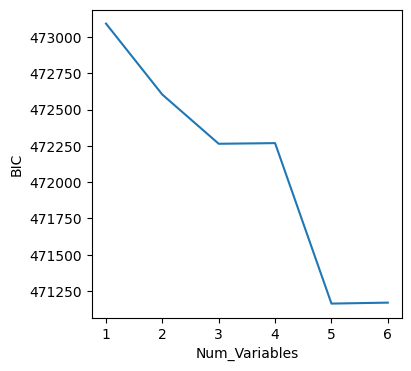

In [64]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.lineplot(data=BIC_models, x="Num_Variables", y="BIC")
plt.show()

In [65]:
# Numero de variables optimo:
n_variables = BIC_models["BIC"].idxmin()+1
print("El número de variables óptimo según el BIC es: ", n_variables)

El número de variables óptimo según el BIC es:  5


In [66]:
%%time
# Calculamos el modelo con el RFE con el numero de variables seleccionadas
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression

lmreg = LinearRegression()
rfe = RFE(lmreg,n_features_to_select = n_variables)

rfe = rfe.fit(X_,y_)

CPU times: total: 15.6 ms
Wall time: 23 ms


In [67]:
# Seleccionar las variables de entrada del modelo de RFE
X_RFE_BIC = X_[X_.columns[rfe.support_]]
X_RFE_BIC.head()

,vistas,habitaciones,ascensor,garage,distrito
0,1,3,1,1,0
1,1,2,1,1,0
2,1,2,0,0,0
3,1,2,1,1,0
4,1,3,0,0,0


In [68]:
# Calculo del modelo con las variables seleccionadas
lm_model_i = sm.OLS(y_, sm.add_constant(X_RFE_BIC)).fit()
lm_model_i.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 precio   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     1857.
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:30:27   Log-Likelihood:            -2.3555e+05
No. Observations:               15975   AIC:                         4.711e+05
Df Residuals:                   15969   BIC:                         4.712e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.494e+05   1.88e+04     -7.940      0.000   -1.86e+05   -1.13e+05
vistas        9.207e+04   1.47e+04      6.261      0.000    6.32e+04    1.21e+05
habitaciones  2.729e+05   3698.370     73.782      0.000    2.66e+05     2.8e+05
ascensor      1.479e+05   1.11e+04     13.282      0.000    1.26e+05     1.7e+05
garage        2.514e+05   1.14e+04     21.973      0.000    2.29e+05    2.74e+05
distrito     -3.004e+04    884.387    -33.970      0.000   -3.18e+04   -2.83e+04
==============================================================================
Omnibus:                    14787.002   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1167763.627
Skew:                           4.220   Prob(JB):                         0.00
Kurtosis:                      44.026   Cond. No.                         47.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Filtro multivariado - según RFE

### RFE con random forest

In [96]:
%%time
# import matplotlib.pyplot as plt
# from sklearn.svm import SVR
# from sklearn.model_selection import StratifiedKFold
# from sklearn.feature_selection import RFECV
# from sklearn.datasets import make_classification
# from sklearn.model_selection import KFold
# from sklearn.ensemble import RandomForestRegressor

# Create the RFE object and compute a cross-validated score.
#svc = SVR(kernel="linear")
#svc = AdaBoostRegressor()
svc = RandomForestRegressor(n_estimators=10)
# The "accuracy" scoring shows the proportion of correct classifications
from sklearn.ensemble import GradientBoostingClassifier
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=KFold(5),
    scoring='neg_mean_absolute_error',
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_, y_)

print("Optimal number of features : %d" % rfecv.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (neg_mean_absolute_error)")
# plt.plot(
#     range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
#     rfecv.grid_scores_,
# )
# plt.errorbar(
#     range(min_features_to_select, len(rfecv.cv_results_) + min_features_to_select),
#     rfecv.cv_results_["mean_test_score"],
#     yerr=rfecv.cv_results_["std_test_score"],
# )
# plt.show()

Optimal number of features : 6
CPU times: total: 9.08 s
Wall time: 9.1 s


In [97]:
# Seleccionamos las variables con RFE-SVM
X_RFE_RF = X_.loc[:,rfecv.support_].copy()
X_RFE_RF.head() #a descartado la variable "vistas"

,tipo,habitaciones,metros,ascensor,garage,distrito
0,5,3,118,1,1,0
1,15,2,82,1,1,0
2,15,2,72,0,0,0
3,18,2,174,1,1,0
4,0,3,75,0,0,0


### RFE con SVM

In [98]:
%%time
# import matplotlib.pyplot as plt
# from sklearn.svm import SVR
# from sklearn.model_selection import StratifiedKFold
# from sklearn.feature_selection import RFECV
# from sklearn.datasets import make_classification
# from sklearn.model_selection import KFold


# Create the RFE object and compute a cross-validated score.
svc = SVR(kernel="linear")
#svc = AdaBoostRegressor()
#svc = RandomForestRegressor(n_estimators=10)
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=KFold(5),
    scoring='neg_mean_absolute_error',
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_, y_)

print("Optimal number of features : %d" % rfecv.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (neg_mean_absolute_error)")
# # plt.plot(
# #     range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
# #     rfecv.grid_scores_,
# # )
# plt.errorbar(
#     range(min_features_to_select, len(rfecv.cv_results_) + min_features_to_select),
#     rfecv.cv_results_["mean_test_score"],
#     yerr=rfecv.cv_results_["std_test_score"],
# )
# plt.show()

Optimal number of features : 6
CPU times: total: 3min 46s
Wall time: 3min 47s


In [100]:
# Seleccionamos las variables con RFE-SVM
X_RFE_SVM = X_.loc[:,rfecv.support_].copy()
X_RFE_SVM.head() # A descartado las variables "garage"

,tipo,vistas,habitaciones,metros,ascensor,distrito
0,5,1,3,118,1,0
1,15,1,2,82,1,0
2,15,1,2,72,0,0
3,18,1,2,174,1,0
4,0,1,3,75,0,0


## Filtro multivariado - BORUTA

Boruta una estrategia para mejorar los problemas que tiene en el RFE

## BORUTA sin estandarizar

In [101]:
%%time
# from boruta import BorutaPy

# definimos el random forest clasificador
randomForest = RandomForestRegressor(n_jobs = -1, max_depth = 4)
randomForest.fit(X_, y_)

# define Boruta feature selection
feature_selection = BorutaPy(randomForest, n_estimators = 'auto', verbose = 1, 
                             random_state = 16, max_iter= 200)

CPU times: total: 1.12 s
Wall time: 338 ms


In [102]:
# Get relevant features
feature_selection.fit(np.array(X_), np.array(y_))

Iteration: 1 / 200
Iteration: 2 / 200
Iteration: 3 / 200
Iteration: 4 / 200
Iteration: 5 / 200
Iteration: 6 / 200
Iteration: 7 / 200
Iteration: 8 / 200
Iteration: 9 / 200
Iteration: 10 / 200
Iteration: 11 / 200
Iteration: 12 / 200
Iteration: 13 / 200
Iteration: 14 / 200
Iteration: 15 / 200
Iteration: 16 / 200
Iteration: 17 / 200
Iteration: 18 / 200
Iteration: 19 / 200
Iteration: 20 / 200
Iteration: 21 / 200
Iteration: 22 / 200


BorutaPy finished running.

Iteration: 	23 / 200
Confirmed: 	5
Tentative: 	0
Rejected: 	2


BorutaPy(estimator=RandomForestRegressor(max_depth=4, n_estimators=86,
                                         n_jobs=-1,
                                         random_state=RandomState(MT19937) at 0x252AE2AC840),
         max_iter=200, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x252AE2AC840, verbose=1)

In [103]:
# Getting all relevant features
feature_selection.support_

array([ True, False, False,  True,  True,  True,  True])

In [104]:
# Getting feature ranking
feature_selection.ranking_

array([1, 3, 2, 1, 1, 1, 1])

In [105]:
# Creating list of varibale name, ranks, and final decision using zip
feature_rankings = list(zip(X_.columns,
                           feature_selection.ranking_,
                           feature_selection.support_))
pd.DataFrame(feature_rankings)

,0,1,2
0,tipo,1,True
1,vistas,3,False
2,habitaciones,2,False
3,metros,1,True
4,ascensor,1,True
5,garage,1,True
6,distrito,1,True


In [106]:
# seleccionamos las variables del resultado del Boruta
X_Boruta = X_.loc[:,feature_selection.support_].copy()
X_Boruta.head()

,tipo,metros,ascensor,garage,distrito
0,5,118,1,1,0
1,15,82,1,1,0
2,15,72,0,0,0
3,18,174,1,1,0
4,0,75,0,0,0


Boruta sin estandarizar, a descartado las variables "vistas" y "habitaciones"

## BORUTA estandarizado

In [107]:
# Estandarizamos los datos de entrada:
X_std = X_.copy()
X_std = StandardScaler().fit_transform(X_).copy()


# definimos el random forest clasificador
randomForest = RandomForestRegressor(n_jobs = -1, max_depth = 4)
randomForest.fit(X_std, y_)

# define Boruta feature selection
feature_selection = BorutaPy(randomForest, n_estimators = 'auto', verbose = 1, 
                             random_state = 16, max_iter= 200)

In [108]:
# Get relevant features
feature_selection.fit(np.array(X_std), np.array(y_))

Iteration: 1 / 200
Iteration: 2 / 200
Iteration: 3 / 200
Iteration: 4 / 200
Iteration: 5 / 200
Iteration: 6 / 200
Iteration: 7 / 200
Iteration: 8 / 200
Iteration: 9 / 200
Iteration: 10 / 200
Iteration: 11 / 200
Iteration: 12 / 200
Iteration: 13 / 200
Iteration: 14 / 200
Iteration: 15 / 200
Iteration: 16 / 200
Iteration: 17 / 200
Iteration: 18 / 200
Iteration: 19 / 200
Iteration: 20 / 200
Iteration: 21 / 200
Iteration: 22 / 200


BorutaPy finished running.

Iteration: 	23 / 200
Confirmed: 	5
Tentative: 	0
Rejected: 	2


BorutaPy(estimator=RandomForestRegressor(max_depth=4, n_estimators=86,
                                         n_jobs=-1,
                                         random_state=RandomState(MT19937) at 0x252AE2AC240),
         max_iter=200, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x252AE2AC240, verbose=1)

In [109]:
# Creating list of varibale name, ranks, and final decision using zip
feature_rankings = list(zip(X_.columns,
                           feature_selection.ranking_,
                           feature_selection.support_))
pd.DataFrame(feature_rankings)

,0,1,2
0,tipo,1,True
1,vistas,3,False
2,habitaciones,2,False
3,metros,1,True
4,ascensor,1,True
5,garage,1,True
6,distrito,1,True


In [110]:
# seleccionamos las variables
X_Boruta_std = X_.loc[:,feature_selection.support_].copy()
X_Boruta_std.head()

,tipo,metros,ascensor,garage,distrito
0,5,118,1,1,0
1,15,82,1,1,0
2,15,72,0,0,0
3,18,174,1,1,0
4,0,75,0,0,0


Boruta estandarizado, a descartado las variables "vistas" y "habitaciones"

# Training

Los pasos del training para un caso de regresión:

- Data split - partición de los datos
- Definir el training: tipo de subsampling, tipos de transformaciones
- Training de algoritmos sencillos - baseline
- Training de algoritmos avanzados (ENSEMBLE ALGORITHMS - boosting o de bagging)
- Optimizar del mejor algoritmo sencillo
- Optimizar el mejor algoritmo avanzado

## Data split - partición de los datos

Normalmente 70-30 u 80-20.

In [111]:
# Seleccionamos los datos de la seleccion de variables.
#el metodo ganador es el Boruta sin estandarizar
X_sel = X_Boruta.copy() # Boruta sin estandarizar

In [114]:
validation_size = 0.20 # el % de datos para validar
seed = 7 # el numero aleatorio para generar la partición
X_train, X_validation, Y_train, Y_validation = train_test_split(X_sel, y_, test_size=validation_size, random_state=seed)
print('Los datos de entrenamiento son:', len(X_train))
print('Los datos de validación son:', len(X_validation))

Los datos de entrenamiento son: 12780
Los datos de validación son: 3195


## Definir las características del training

Hay varias opciones de subsmapling para evitar el overfitting del algoritmo.

- Crear 10 grupos de 3 repeticiones – k-fold
- Crear 100 nuevos grupos generando la muestra a partir de la distribución de training data- bootstraping
- Quitar una variable de entrada cada vez – LOOCV

El más común y utilizado es el k-fold validation.

In [115]:
# Defenimos el subsampling y el seed number
num_folds = 10
seed = 7
scoring = 'r2'

## Training de algoritmos básicos sin ESTANDARIZAR

In [117]:
# Definimos los algoritmos basicos
models = []
#crear los nombres de los modelos
nombres = []
models.append(('LR', LinearRegression()))
nombres.append('LR')
models.append(('LASSO', Lasso()))
nombres.append('LASSO')
models.append(('KNN', KNeighborsRegressor()))
nombres.append('KNN')
models.append(('CART', DecisionTreeRegressor()))
nombres.append('CART')

In [118]:
# crear una data frame con 1 columna y un vector (basura) con la longitud de models
# para almacenar los resultados de Accuracy de cada uno de los modelos
#res_alg_bas = pd.DataFrame({'R2' : np.empty(len(models))})
res_alg_bas = pd.DataFrame({'R2_train' : np.empty(len(models)),
                            'MAE_train' : np.empty(len(models)),
                            'RMSE_train' : np.empty(len(models)),
                            'MSE_train' : np.empty(len(models)),
                            'R2_test' : np.empty(len(models)),
                            'MAE_test' : np.empty(len(models)),
                            'RMSE_test' : np.empty(len(models)),
                            'MSE_test' : np.empty(len(models)),                         
                           })
res_alg_bas.index = nombres

In [119]:
%%time
# evaluamos los algoritmos basicos
results = []
names = []
j = 0
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print("Algoritmo: ", model)
    print("-------------------")
    print(msg)
    print('Resultados de TRAIN:')
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_train)
    mae_train = metrics.mean_absolute_error(Y_train, y_pred)
    mse_train = metrics.mean_squared_error(Y_train, y_pred)
    rmse_train = np.sqrt(mse_train) # or mse**(0.5)  
    r2_train = metrics.r2_score(Y_train,y_pred)
    #añadir el resultado a un df
    res_alg_bas['R2_train'].loc[nombres[j]] = r2_train
    res_alg_bas['MAE_train'].loc[nombres[j]] = mae_train
    res_alg_bas['RMSE_train'].loc[nombres[j]] = rmse_train
    res_alg_bas['MSE_train'].loc[nombres[j]] = mse_train
    print("R-Squared:", r2_train)
    print("MAE:",mae_train)
    print("RMSE:", rmse_train)
    print("MSE:", mse_train)   
    print("-------------------")
    print('Resultados de TEST:')
    y_pred = model.predict(X_validation)
    mae_test = metrics.mean_absolute_error(Y_validation, y_pred)
    mse_test = metrics.mean_squared_error(Y_validation,y_pred)
    rmse_test = np.sqrt(mse_test) # or mse**(0.5)  
    r2_test = metrics.r2_score(Y_validation,y_pred)
    #añadir el resultado a un df
    res_alg_bas['R2_test'].loc[nombres[j]] = r2_test
    res_alg_bas['MAE_test'].loc[nombres[j]] = mae_test
    res_alg_bas['RMSE_test'].loc[nombres[j]] = rmse_test
    res_alg_bas['MSE_test'].loc[nombres[j]] = mse_test
    print("R-Squared:", r2_test)
    print("MAE:",mae_test)
    print("RMSE:", rmse_test)
    print("MSE:", mse_test)
    j = j+1
    print("-------------------")
    print("-------------------")

Algoritmo:  LinearRegression()
-------------------
LR: 0.669214 (0.026379)
Resultados de TRAIN:
R-Squared: 0.6684317582179116
MAE: 228970.77001720213
RMSE: 439727.88814305887
MSE: 193360615610.7545
-------------------
Resultados de TEST:
R-Squared: 0.7075770980044438
MAE: 227947.38053182943
RMSE: 432132.64013847354
MSE: 186738618673.04745
-------------------
-------------------
Algoritmo:  Lasso()
-------------------
LASSO: 0.669214 (0.026379)
Resultados de TRAIN:
R-Squared: 0.6684317581944274
MAE: 228970.4703178797
RMSE: 439727.88815863134
MSE: 193360615624.4498
-------------------
Resultados de TEST:
R-Squared: 0.7075771107124895
MAE: 227947.09164845746
RMSE: 432132.63074871415
MSE: 186738610557.8045
-------------------
-------------------
Algoritmo:  KNeighborsRegressor()
-------------------
KNN: 0.805815 (0.019528)
Resultados de TRAIN:
R-Squared: 0.8793441960626567
MAE: 128128.54125195618
RMSE: 265259.9330852509
MSE: 70362832100.3918
-------------------
Resultados de TEST:
R-Square

In [120]:
#mostrarmos el resultado de cada algoritmo
#res_alg_bas
res_alg_bas.sort_values(by=['R2_train', 'R2_test'], ascending=False).head(10)

,R2_train,MAE_train,RMSE_train,MSE_train,R2_test,MAE_test,RMSE_test,MSE_test
CART,0.994071,14719.284692,58801.046188,3.457563e+09,0.814325,130199.834509,344340.124352,1.185701e+11
KNN,0.879344,128128.541252,265259.933085,7.036283e+10,0.789459,161261.167449,366673.827332,1.344497e+11
LR,0.668432,228970.770017,439727.888143,1.933606e+11,0.707577,227947.380532,432132.640138,1.867386e+11
LASSO,0.668432,228970.470318,439727.888159,1.933606e+11,0.707577,227947.091648,432132.630749,1.867386e+11


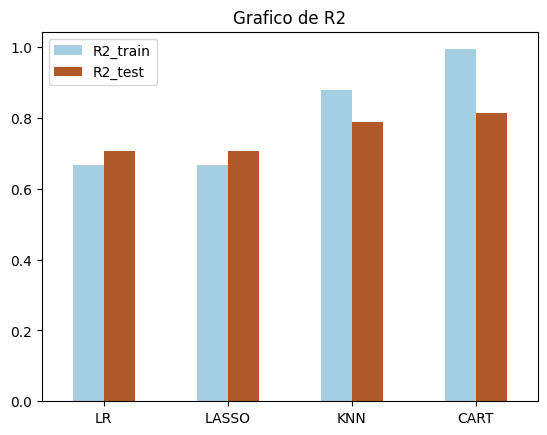

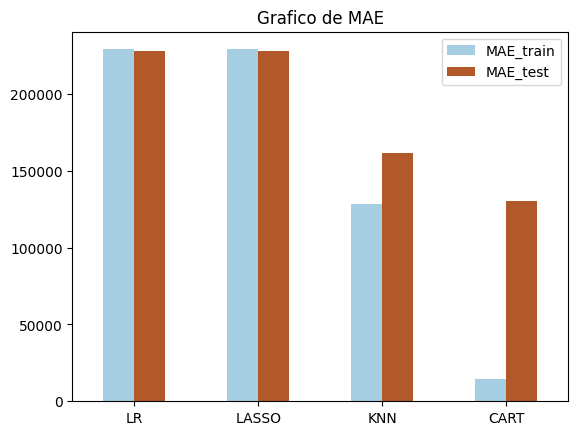

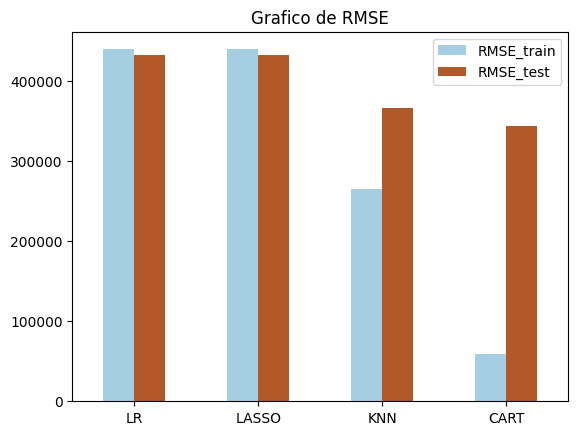

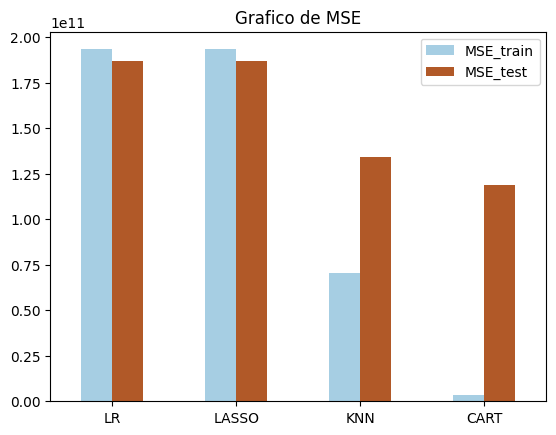

In [121]:
ax = res_alg_bas.plot.bar(title="Grafico de R2", y=['R2_train', 'R2_test'], rot=0, colormap='Paired')
ax = res_alg_bas.plot.bar(title="Grafico de MAE", y=['MAE_train', 'MAE_test'], rot=0, colormap='Paired')
ax = res_alg_bas.plot.bar(title="Grafico de RMSE", y=['RMSE_train', 'RMSE_test'], rot=0, colormap='Paired')
ax = res_alg_bas.plot.bar(title="Grafico de MSE", y=['MSE_train', 'MSE_test'], rot=0, colormap='Paired')

## Training de algoritmos básicos ESTANDARIZADOS

In [123]:
# Definimos el pipeline con estandarizacion y el modelo:
models_std = []
#crear los nombres de los modelos
nombres_models_std = []
models_std.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
nombres_models_std.append('ScaledLR')
models_std.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
nombres_models_std.append('ScaledLASSO')
models_std.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
nombres_models_std.append('ScaledEN')
models_std.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
nombres_models_std.append('ScaledKNN')
models_std.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
nombres_models_std.append('ScaledCART')

In [124]:
# crear una data frame con 1 columna y un vector (basura) con la longitud de models
# para almacenar los resultados de Accuracy de cada uno de los modelos
res_alg_bas_std = pd.DataFrame({'R2_train' : np.empty(len(models_std)),
                                'MAE_train' : np.empty(len(models_std)),
                                'RMSE_train' : np.empty(len(models_std)),
                                'MSE_train' : np.empty(len(models_std)),
                                'R2_test' : np.empty(len(models_std)),
                                'MAE_test' : np.empty(len(models_std)),
                                'RMSE_test' : np.empty(len(models_std)),
                                'MSE_test' : np.empty(len(models_std)),                         
                               })

res_alg_bas_std.index = nombres_models_std

In [125]:
%%time
# Evaluamos los algoritmos:
results = []
names = []
j = 0
for name, model in models_std:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print("Algoritmo: ", model)
    print("-------------------")
    print(msg)
    print('Resultados de TRAIN:')
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_train)
    mae_train = metrics.mean_absolute_error(Y_train, y_pred)
    mse_train = metrics.mean_squared_error(Y_train, y_pred)
    rmse_train = np.sqrt(mse_train) # or mse**(0.5)  
    r2_train = metrics.r2_score(Y_train,y_pred)
    #añadir el resultado a un df
    res_alg_bas_std['R2_train'].loc[nombres_models_std[j]] = r2_train
    res_alg_bas_std['MAE_train'].loc[nombres_models_std[j]] = mae_train
    res_alg_bas_std['RMSE_train'].loc[nombres_models_std[j]] = rmse_train
    res_alg_bas_std['MSE_train'].loc[nombres_models_std[j]] = mse_train
    print("R-Squared:", r2_train)
    print("MAE:",mae_train)
    print("RMSE:", rmse_train)
    print("MSE:", mse_train)   
    print("-------------------")
    print('Resultados de TEST:')
    y_pred = model.predict(X_validation)
    mae_test = metrics.mean_absolute_error(Y_validation, y_pred)
    mse_test = metrics.mean_squared_error(Y_validation,y_pred)
    rmse_test = np.sqrt(mse_test) # or mse**(0.5)  
    r2_test = metrics.r2_score(Y_validation,y_pred)
    #añadir el resultado a un df
    res_alg_bas_std['R2_test'].loc[nombres_models_std[j]] = r2_test
    res_alg_bas_std['MAE_test'].loc[nombres_models_std[j]] = mae_test
    res_alg_bas_std['RMSE_test'].loc[nombres_models_std[j]] = rmse_test
    res_alg_bas_std['MSE_test'].loc[nombres_models_std[j]] = mse_test
    print("R-Squared:", r2_test)
    print("MAE:",mae_test)
    print("RMSE:", rmse_test)
    print("MSE:", mse_test)
    j = j+1
    print("-------------------")
    print("-------------------")

Algoritmo:  Pipeline(steps=[('Scaler', StandardScaler()), ('LR', LinearRegression())])
-------------------
ScaledLR: 0.669214 (0.026379)
Resultados de TRAIN:
R-Squared: 0.6684317582179116
MAE: 228970.77001720233
RMSE: 439727.88814305887
MSE: 193360615610.7545
-------------------
Resultados de TEST:
R-Squared: 0.707577098004444
MAE: 227947.38053182958
RMSE: 432132.64013847336
MSE: 186738618673.04733
-------------------
-------------------
Algoritmo:  Pipeline(steps=[('Scaler', StandardScaler()), ('LASSO', Lasso())])
-------------------
ScaledLASSO: 0.669214 (0.026379)
Resultados de TRAIN:
R-Squared: 0.6684317582083951
MAE: 228970.42800318054
RMSE: 439727.88814936933
MSE: 193360615616.30426
-------------------
Resultados de TEST:
R-Squared: 0.7075768786098007
MAE: 227947.0711411719
RMSE: 432132.802245422
MSE: 186738758776.481
-------------------
-------------------
Algoritmo:  Pipeline(steps=[('Scaler', StandardScaler()), ('EN', ElasticNet())])
-------------------
ScaledEN: 0.599386 (0.0

In [126]:
#mostrarmos el resultado de cada algoritmo
#res_alg_bas
res_alg_bas_std.sort_values(by=['R2_train'], ascending=False)

,R2_train,MAE_train,RMSE_train,MSE_train,R2_test,MAE_test,RMSE_test,MSE_test
ScaledCART,0.994071,14719.284692,58801.046188,3.457563e+09,0.837519,127548.354890,322116.381726,1.037590e+11
ScaledKNN,0.905532,106366.495618,234714.450683,5.509087e+10,0.817136,133977.675869,341723.819419,1.167752e+11
ScaledLR,0.668432,228970.770017,439727.888143,1.933606e+11,0.707577,227947.380532,432132.640138,1.867386e+11
ScaledLASSO,0.668432,228970.428003,439727.888149,1.933606e+11,0.707577,227947.071141,432132.802245,1.867388e+11
ScaledEN,0.598378,257863.742472,483956.462802,2.342139e+11,0.597874,258204.608690,506748.312127,2.567939e+11


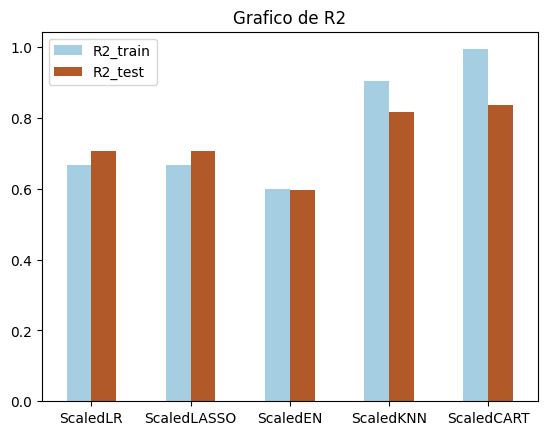

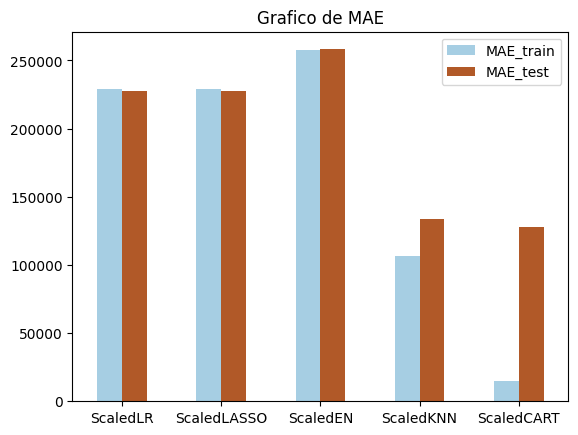

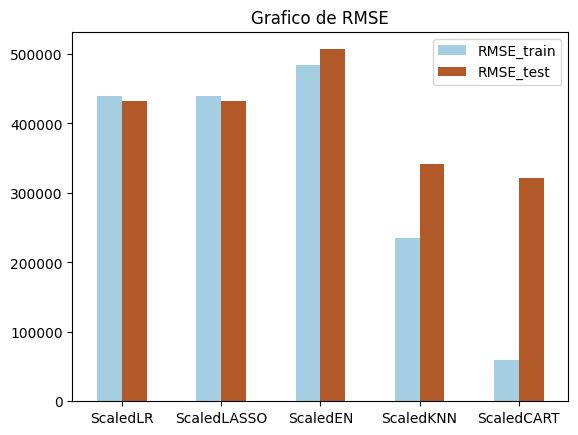

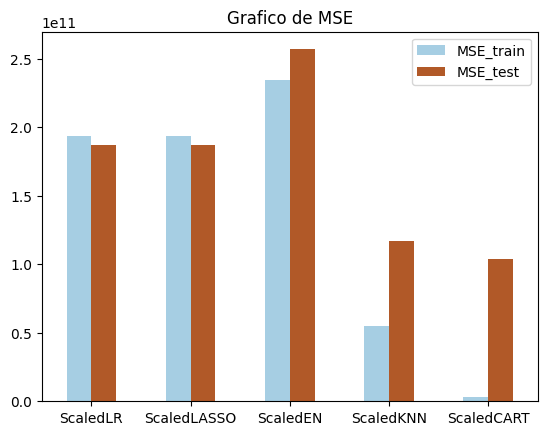

In [127]:
ax = res_alg_bas_std.plot.bar(title="Grafico de R2", y=['R2_train', 'R2_test'], rot=0, colormap='Paired')
ax = res_alg_bas_std.plot.bar(title="Grafico de MAE", y=['MAE_train', 'MAE_test'], rot=0, colormap='Paired')
ax = res_alg_bas_std.plot.bar(title="Grafico de RMSE", y=['RMSE_train', 'RMSE_test'], rot=0, colormap='Paired')
ax = res_alg_bas_std.plot.bar(title="Grafico de MSE", y=['MSE_train', 'MSE_test'], rot=0, colormap='Paired')

## Training de algoritmos avanzados sin estandarizar

In [130]:
# Definimos los algoritmos
models_ava = []
#crear los nombres de los modelos
nombres_models_ava = []
models_ava.append(('AB', AdaBoostRegressor()))
nombres_models_ava.append('AB')
models_ava.append(('GBM', GradientBoostingRegressor()))
nombres_models_ava.append('GBM')
models_ava.append(('RF', RandomForestRegressor(n_estimators=10)))
nombres_models_ava.append('RF')
models_ava.append(('ET', ExtraTreesRegressor(n_estimators=10)))
nombres_models_ava.append('ET')

In [131]:
# crear una data frame con 1 columna y un vector (basura) con la longitud de models
# para almacenar los resultados de Accuracy de cada uno de los modelos
res_alg_ava = pd.DataFrame({'R2_train' : np.empty(len(models_ava)),
                            'MAE_train' : np.empty(len(models_ava)),
                            'RMSE_train' : np.empty(len(models_ava)),
                            'MSE_train' : np.empty(len(models_ava)),
                            'R2_test' : np.empty(len(models_ava)),
                            'MAE_test' : np.empty(len(models_ava)),
                            'RMSE_test' : np.empty(len(models_ava)),
                            'MSE_test' : np.empty(len(models_ava)),                         
                            })
res_alg_ava.index = nombres_models_ava

In [132]:
%%time
# entrenamos los algoritmos
results = []
names = []
j = 0
for name, model in models_ava:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print("Algoritmo: ", model)
    print("-------------------")
    print(msg)
    print('Resultados de TRAIN:')
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_train)
    mae_train = metrics.mean_absolute_error(Y_train, y_pred)
    mse_train = metrics.mean_squared_error(Y_train, y_pred)
    rmse_train = np.sqrt(mse_train) # or mse**(0.5)  
    r2_train = metrics.r2_score(Y_train,y_pred)
    #añadir el resultado a un df
    res_alg_ava['R2_train'].loc[nombres_models_ava[j]] = r2_train
    res_alg_ava['MAE_train'].loc[nombres_models_ava[j]] = mae_train
    res_alg_ava['RMSE_train'].loc[nombres_models_ava[j]] = rmse_train
    res_alg_ava['MSE_train'].loc[nombres_models_ava[j]] = mse_train
    print("R-Squared:", r2_train)
    print("MAE:",mae_train)
    print("RMSE:", rmse_train)
    print("MSE:", mse_train)   
    print("-------------------")
    print('Resultados de TEST:')
    y_pred = model.predict(X_validation)
    mae_test = metrics.mean_absolute_error(Y_validation, y_pred)
    mse_test = metrics.mean_squared_error(Y_validation,y_pred)
    rmse_test = np.sqrt(mse_test) # or mse**(0.5)  
    r2_test = metrics.r2_score(Y_validation,y_pred)
    #añadir el resultado a un df
    res_alg_ava['R2_test'].loc[nombres_models_ava[j]] = r2_test
    res_alg_ava['MAE_test'].loc[nombres_models_ava[j]] = mae_test
    res_alg_ava['RMSE_test'].loc[nombres_models_ava[j]] = rmse_test
    res_alg_ava['MSE_test'].loc[nombres_models_ava[j]] = mse_test
    print("R-Squared:", r2_test)
    print("MAE:",mae_test)
    print("RMSE:", rmse_test)
    print("MSE:", mse_test)
    j = j+1
    print("-------------------")
    print("-------------------")

Algoritmo:  AdaBoostRegressor()
-------------------
AB: 0.734038 (0.034377)
Resultados de TRAIN:
R-Squared: 0.7708300126827381
MAE: 235577.42888829712
RMSE: 365574.939864222
MSE: 133645036656.72954
-------------------
Resultados de TEST:
R-Squared: 0.7532168527246688
MAE: 239228.2692390612
RMSE: 396980.45841866394
MSE: 157593484366.29257
-------------------
-------------------
Algoritmo:  GradientBoostingRegressor()
-------------------
GBM: 0.859177 (0.021420)
Resultados de TRAIN:
R-Squared: 0.8867415714760659
MAE: 139220.3278721725
RMSE: 256999.81611392734
MSE: 66048905482.592476
-------------------
Resultados de TEST:
R-Squared: 0.8593073245701439
MAE: 145503.4546214216
RMSE: 299741.6707865626
MSE: 89845069205.92007
-------------------
-------------------
Algoritmo:  RandomForestRegressor(n_estimators=10)
-------------------
RF: 0.868283 (0.015485)
Resultados de TRAIN:
R-Squared: 0.9754021146567021
MAE: 53323.28162403122
RMSE: 119769.55426442086
MSE: 14344746128.698053
--------------

In [133]:
#mostrarmos el resultado de cada algoritmo
#res_alg_bas
res_alg_ava.sort_values(by=['R2_train'], ascending=False)

,R2_train,MAE_train,RMSE_train,MSE_train,R2_test,MAE_test,RMSE_test,MSE_test
ET,0.994071,14725.193403,58801.366841,3.457601e+09,0.851939,117674.999092,307491.002319,9.455072e+10
RF,0.975402,53323.281624,119769.554264,1.434475e+10,0.866234,120152.627366,292270.445210,8.542201e+10
GBM,0.886742,139220.327872,256999.816114,6.604891e+10,0.859307,145503.454621,299741.670787,8.984507e+10
AB,0.770830,235577.428888,365574.939864,1.336450e+11,0.753217,239228.269239,396980.458419,1.575935e+11


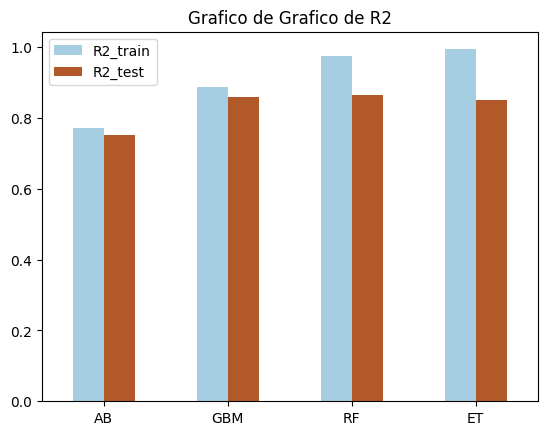

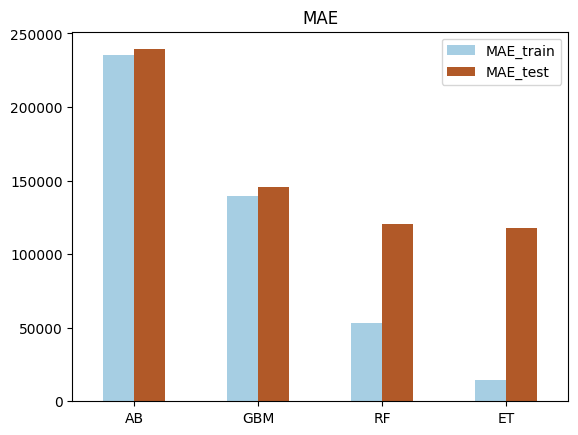

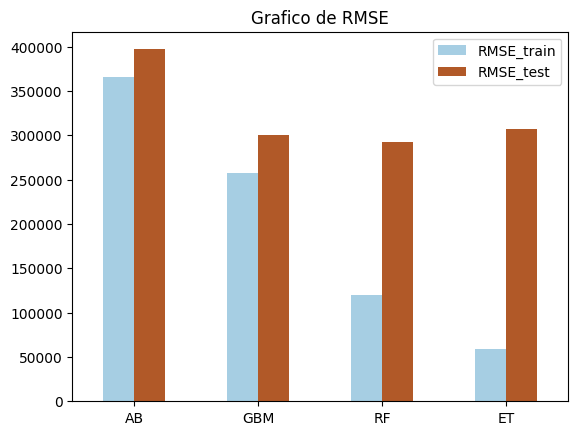

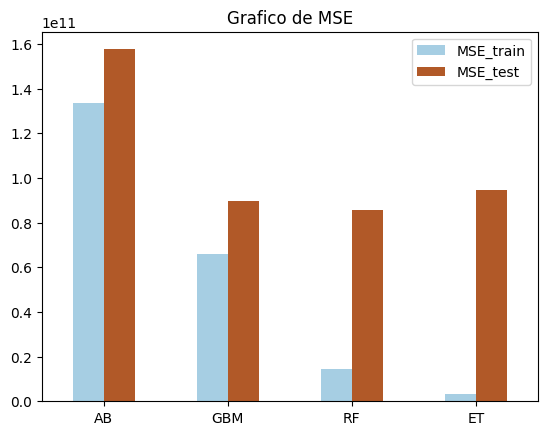

In [134]:
ax = res_alg_ava.plot.bar(title="Grafico de Grafico de R2", y=['R2_train', 'R2_test'], rot=0, colormap='Paired')
ax = res_alg_ava.plot.bar(title="MAE", y=['MAE_train', 'MAE_test'], rot=0, colormap='Paired')
ax = res_alg_ava.plot.bar(title="Grafico de RMSE", y=['RMSE_train', 'RMSE_test'], rot=0, colormap='Paired')
ax = res_alg_ava.plot.bar(title="Grafico de MSE", y=['MSE_train', 'MSE_test'], rot=0, colormap='Paired')

## Training de algoritmos avanzados estandarizados

In [135]:
# Definimos los algoritmos
models_ava_std = []
#crear los nombres de los modelos
nombres_models_ava_std = []
models_ava_std.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
nombres_models_ava_std.append('ScaledAB')
models_ava_std.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
nombres_models_ava_std.append('ScaledGBM')
models_ava_std.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(n_estimators=10))])))
nombres_models_ava_std.append('ScaledRF')
models_ava_std.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor(n_estimators=10))])))
nombres_models_ava_std.append('ScaledET')

In [136]:
# crear una data frame con 1 columna y un vector (basura) con la longitud de models
# para almacenar los resultados de Accuracy de cada uno de los modelos
res_alg_ava_std = pd.DataFrame({'R2_train' : np.empty(len(models_ava_std)),
                                'MAE_train' : np.empty(len(models_ava_std)),
                                'RMSE_train' : np.empty(len(models_ava_std)),
                                'MSE_train' : np.empty(len(models_ava_std)),
                                'R2_test' : np.empty(len(models_ava_std)),
                                'MAE_test' : np.empty(len(models_ava_std)),
                                'RMSE_test' : np.empty(len(models_ava_std)),
                                'MSE_test' : np.empty(len(models_ava_std)),                         
                                })
res_alg_ava_std.index = nombres_models_ava_std

In [137]:
%%time
# entrenamos los algoritmos
results = []
names = []
j = 0
for name, model in models_ava_std:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print("Algoritmo: ", model)
    print("-------------------")
    print(msg)
    print('Resultados de training:')
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_train)
    mae_train = metrics.mean_absolute_error(Y_train, y_pred)
    mse_train = metrics.mean_squared_error(Y_train, y_pred)
    rmse_train = np.sqrt(mse_train) # or mse**(0.5)  
    r2_train = metrics.r2_score(Y_train,y_pred)
    #añadir el resultado a un df
    res_alg_ava_std['R2_train'].loc[nombres_models_ava_std[j]] = r2_train
    res_alg_ava_std['MAE_train'].loc[nombres_models_ava_std[j]] = mae_train
    res_alg_ava_std['RMSE_train'].loc[nombres_models_ava_std[j]] = rmse_train
    res_alg_ava_std['MSE_train'].loc[nombres_models_ava_std[j]] = mse_train
    print("R-Squared:", r2_train)
    print("MAE:",mae_train)
    print("RMSE:", rmse_train)
    print("MSE:", mse_train)   
    print("-------------------")
    print('Resultados de test:')
    y_pred = model.predict(X_validation)
    mae_test = metrics.mean_absolute_error(Y_validation, y_pred)
    mse_test = metrics.mean_squared_error(Y_validation,y_pred)
    rmse_test = np.sqrt(mse_test) # or mse**(0.5)  
    r2_test = metrics.r2_score(Y_validation,y_pred)
    #añadir el resultado a un df
    res_alg_ava_std['R2_test'].loc[nombres_models_ava_std[j]] = r2_test
    res_alg_ava_std['MAE_test'].loc[nombres_models_ava_std[j]] = mae_test
    res_alg_ava_std['RMSE_test'].loc[nombres_models_ava_std[j]] = rmse_test
    res_alg_ava_std['MSE_test'].loc[nombres_models_ava_std[j]] = mse_test
    print("R-Squared:", r2_test)
    print("MAE:",mae_test)
    print("RMSE:", rmse_test)
    print("MSE:", mse_test)
    j = j+1
    print("-------------------")
    print("-------------------")

Algoritmo:  Pipeline(steps=[('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])
-------------------
ScaledAB: 0.728804 (0.026172)
Resultados de training:
R-Squared: 0.7698542242732931
MAE: 250290.02167563626
RMSE: 366352.40831427404
MSE: 134214087077.66856
-------------------
Resultados de test:
R-Squared: 0.7490920577356059
MAE: 254836.06820463424
RMSE: 400284.325343005
MSE: 160227541115.3047
-------------------
-------------------
Algoritmo:  Pipeline(steps=[('Scaler', StandardScaler()),
                ('GBM', GradientBoostingRegressor())])
-------------------
ScaledGBM: 0.859312 (0.021437)
Resultados de training:
R-Squared: 0.8867415714760659
MAE: 139220.3278721725
RMSE: 256999.81611392734
MSE: 66048905482.592476
-------------------
Resultados de test:
R-Squared: 0.8594245059426484
MAE: 145427.20546923875
RMSE: 299616.8190238589
MSE: 89770238241.97581
-------------------
-------------------
Algoritmo:  Pipeline(steps=[('Scaler', StandardScaler()),
                ('RF', Ran

In [138]:
#mostrarmos el resultado de cada algoritmo
#res_alg_bas
res_alg_ava_std.sort_values(by=['R2_train'], ascending=False)

,R2_train,MAE_train,RMSE_train,MSE_train,R2_test,MAE_test,RMSE_test,MSE_test
ScaledET,0.994071,14721.967008,58801.128218,3.457573e+09,0.854341,117780.654094,304986.447505,9.301673e+10
ScaledRF,0.974373,53142.561107,122248.757726,1.494476e+10,0.872455,120375.554740,285393.077175,8.144921e+10
ScaledGBM,0.886742,139220.327872,256999.816114,6.604891e+10,0.859425,145427.205469,299616.819024,8.977024e+10
ScaledAB,0.769854,250290.021676,366352.408314,1.342141e+11,0.749092,254836.068205,400284.325343,1.602275e+11


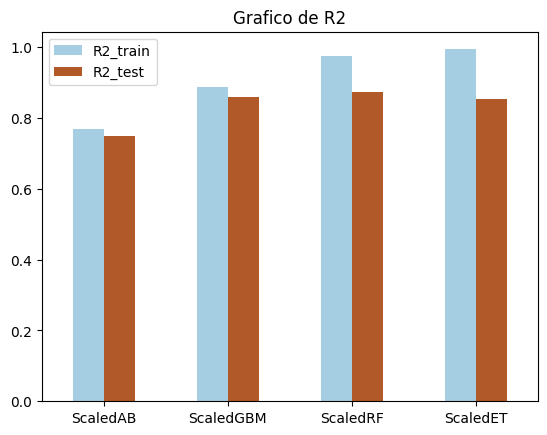

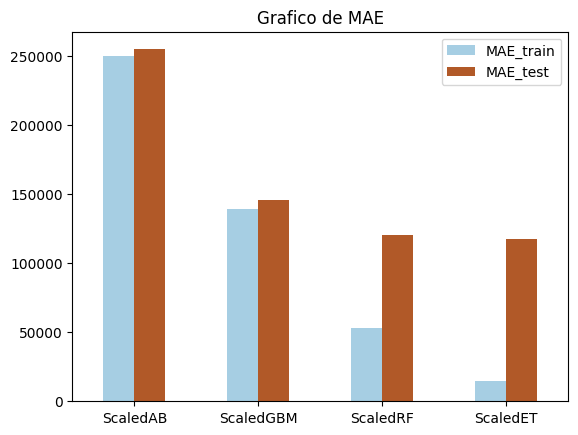

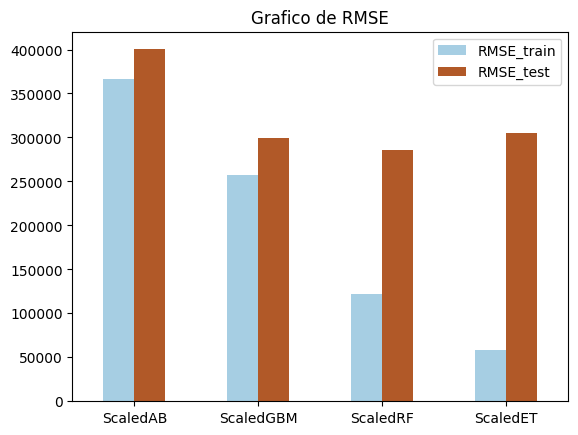

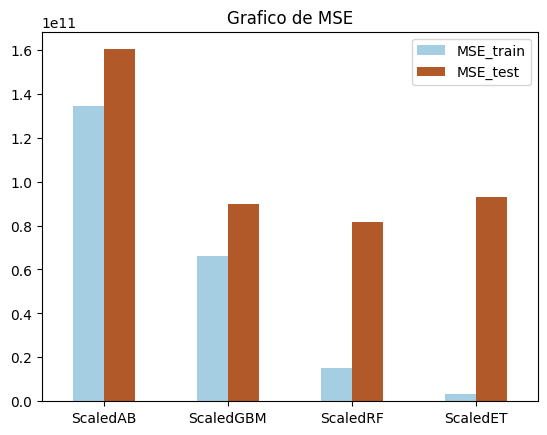

In [139]:
ax = res_alg_ava_std.plot.bar(title="Grafico de R2", y=['R2_train', 'R2_test'], rot=0, colormap='Paired')
ax = res_alg_ava_std.plot.bar(title="Grafico de MAE", y=['MAE_train', 'MAE_test'], rot=0, colormap='Paired')
ax = res_alg_ava_std.plot.bar(title="Grafico de RMSE", y=['RMSE_train', 'RMSE_test'], rot=0, colormap='Paired')
ax = res_alg_ava_std.plot.bar(title="Grafico de MSE", y=['MSE_train', 'MSE_test'], rot=0, colormap='Paired')

# Modelo ganador

In [140]:
#mostrar todos lso df
df_resultados = pd.DataFrame()
df_resultados = pd.concat([df_resultados, res_alg_bas])
df_resultados = pd.concat([df_resultados, res_alg_bas_std])
df_resultados = pd.concat([df_resultados, res_alg_ava])
df_resultados = pd.concat([df_resultados, res_alg_ava_std])
#df_resultados.sort_values(by=['R2_train'], ascending=False)
#filtrar por datos de test por el valor menor de RMSE
#df_resultados.sort_values(by=['RMSE_test'], ascending=True)
# filtrar por el R2 de test
df_resultados.sort_values(by=['R2_test'], ascending=False)

,R2_train,MAE_train,RMSE_train,MSE_train,R2_test,MAE_test,RMSE_test,MSE_test
ScaledRF,0.974373,53142.561107,122248.757726,1.494476e+10,0.872455,120375.554740,285393.077175,8.144921e+10
RF,0.975402,53323.281624,119769.554264,1.434475e+10,0.866234,120152.627366,292270.445210,8.542201e+10
ScaledGBM,0.886742,139220.327872,256999.816114,6.604891e+10,0.859425,145427.205469,299616.819024,8.977024e+10
GBM,0.886742,139220.327872,256999.816114,6.604891e+10,0.859307,145503.454621,299741.670787,8.984507e+10
ScaledET,0.994071,14721.967008,58801.128218,3.457573e+09,0.854341,117780.654094,304986.447505,9.301673e+10
ET,0.994071,14725.193403,58801.366841,3.457601e+09,0.851939,117674.999092,307491.002319,9.455072e+10
ScaledCART,0.994071,14719.284692,58801.046188,3.457563e+09,0.837519,127548.354890,322116.381726,1.037590e+11
ScaledKNN,0.905532,106366.495618,234714.450683,5.509087e+10,0.817136,133977.675869,341723.819419,1.167752e+11
CART,0.994071,14719.284692,58801.046188,3.457563e+09,0.814325,130199.834509,344340.124352,1.185701e+11
KNN,0.879344,128128.541252,265259.933085,7.036283e+10,0.789459,161261.167449,366673.827332,1.344497e+11


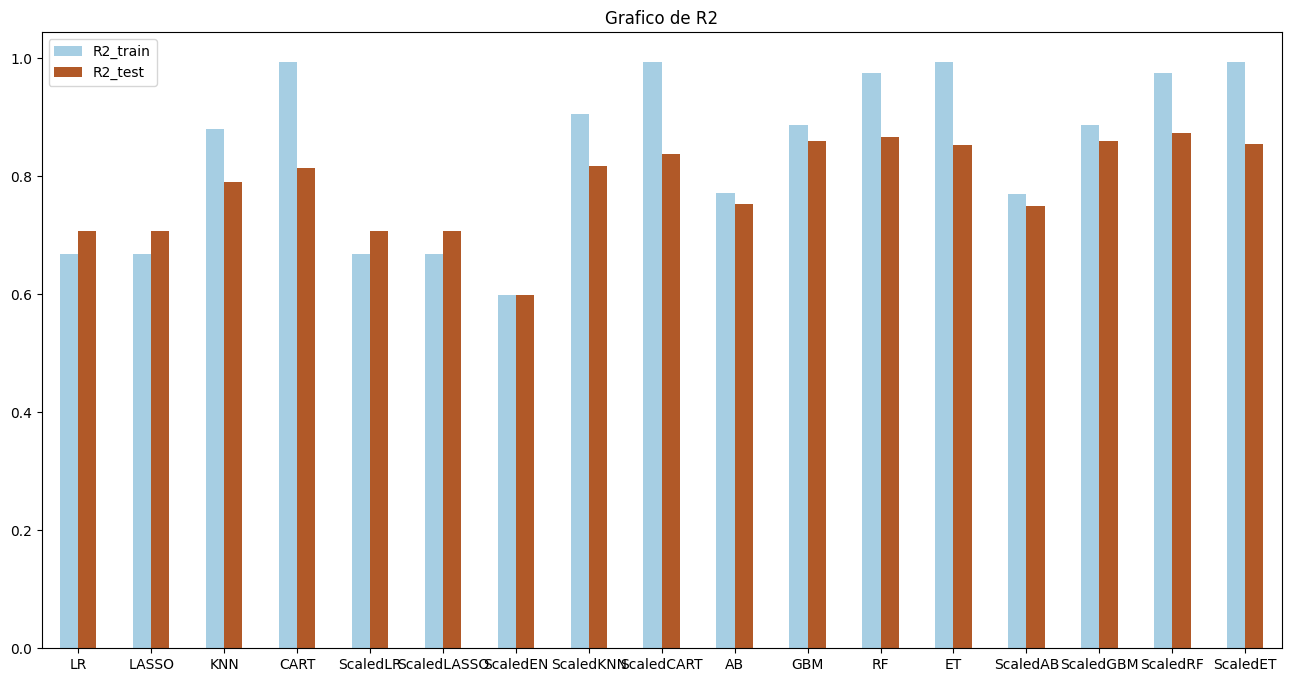

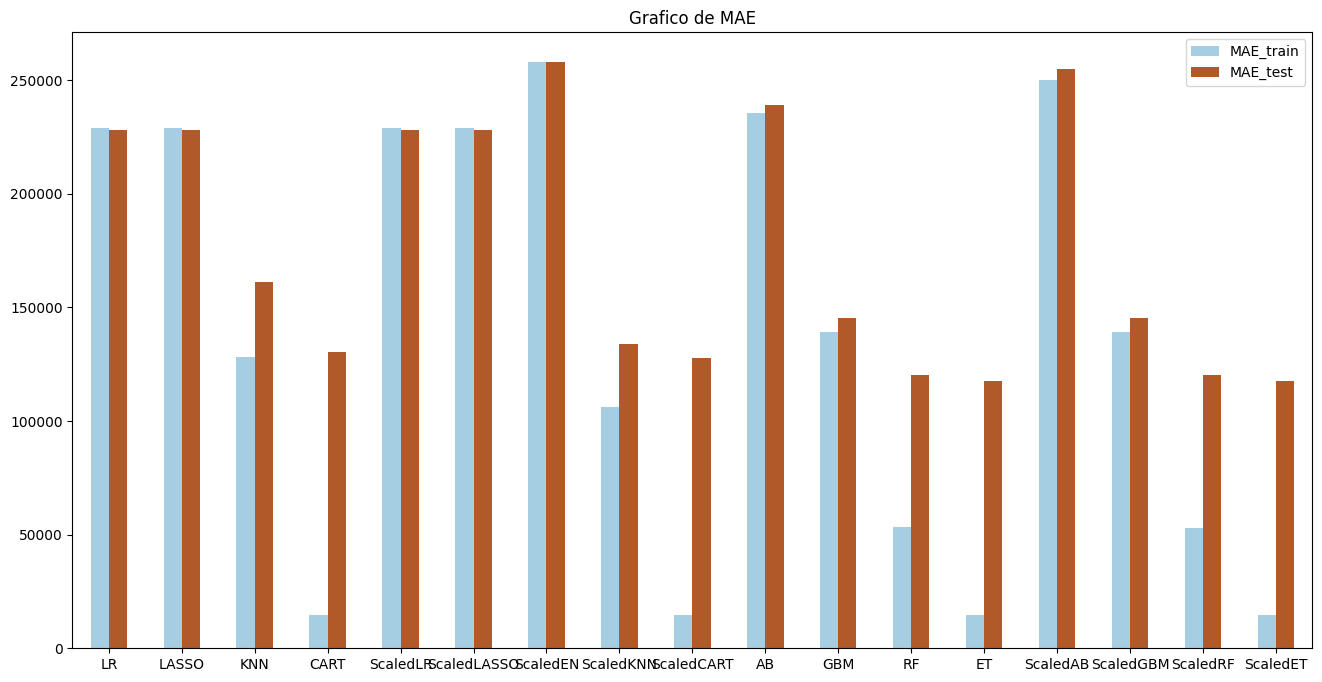

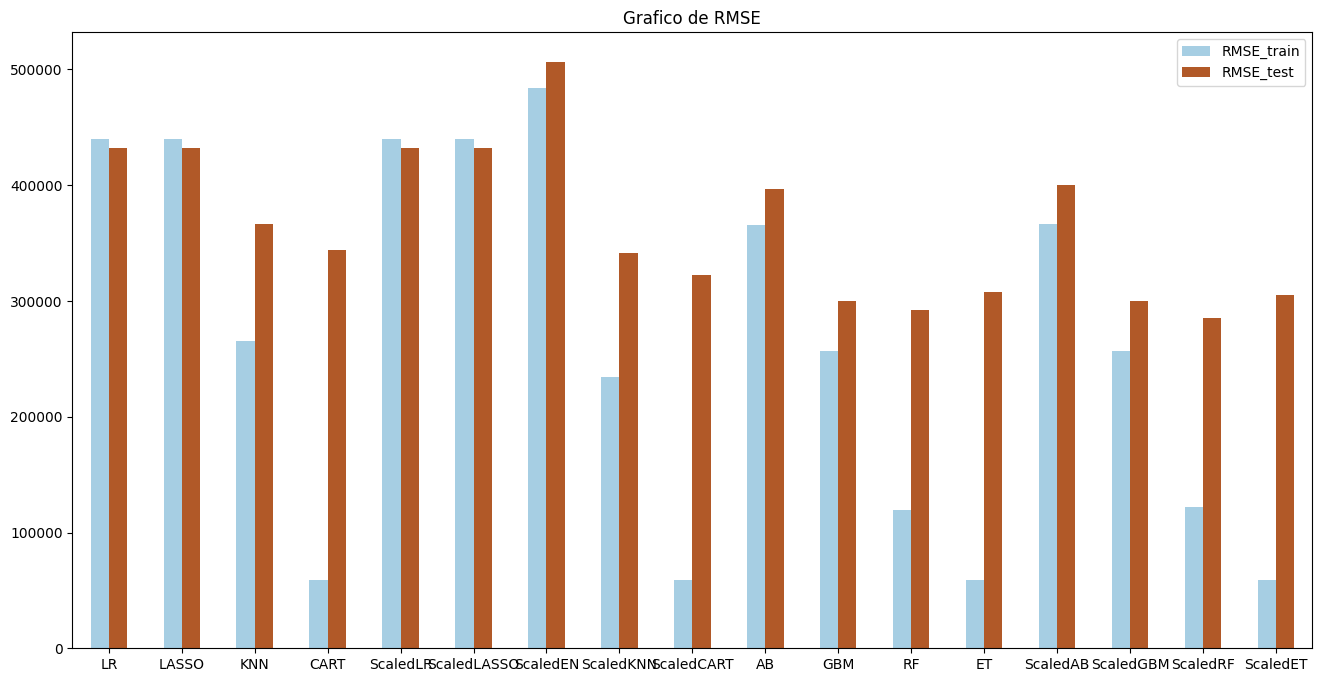

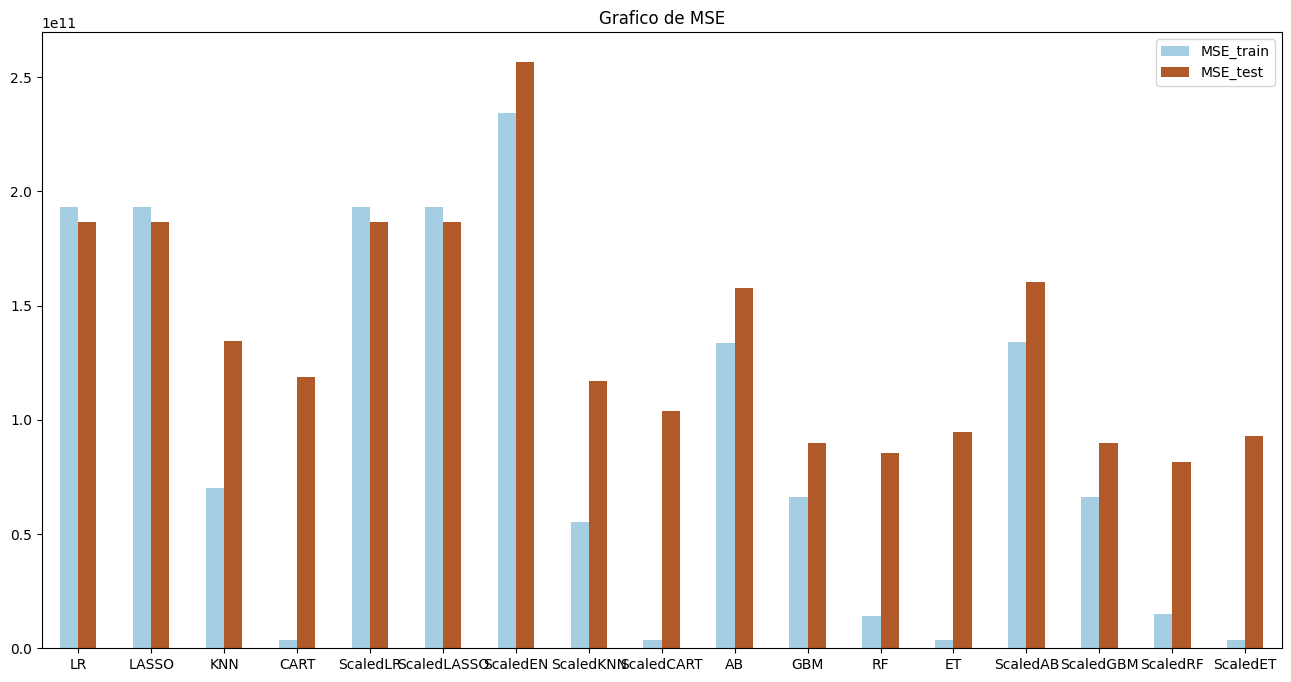

In [141]:
ax = df_resultados.plot.bar(title="Grafico de R2", y=['R2_train', 'R2_test'], rot=0, colormap='Paired', figsize=(16, 8))
ax = df_resultados.plot.bar(title="Grafico de MAE", y=['MAE_train', 'MAE_test'], rot=0, colormap='Paired', figsize=(16, 8))
ax = df_resultados.plot.bar(title="Grafico de RMSE", y=['RMSE_train', 'RMSE_test'], rot=0, colormap='Paired', figsize=(16, 8))
ax = df_resultados.plot.bar(title="Grafico de MSE", y=['MSE_train', 'MSE_test'], rot=0, colormap='Paired', figsize=(16, 8))

# Resultados finales

## Mostrar resultados

In [142]:
#obtener la fila del mejor resultado
df_resultados.sort_values(by=['RMSE_test'], ascending=True).iloc[0,:]

R2_train      9.743732e-01
MAE_train     5.314256e+04
RMSE_train    1.222488e+05
MSE_train     1.494476e+10
R2_test       8.724548e-01
MAE_test      1.203756e+05
RMSE_test     2.853931e+05
MSE_test      8.144921e+10
Name: ScaledRF, dtype: float64

In [143]:
#el mejor algoritmo "ScaledRF" también tiene el mejor R2 en test
#ordenar por el R2 de mayor a menor, los 5 primeros registros
df_resultados.sort_values(by=['R2_test'], ascending=False).iloc[0:5,:]

,R2_train,MAE_train,RMSE_train,MSE_train,R2_test,MAE_test,RMSE_test,MSE_test
ScaledRF,0.974373,53142.561107,122248.757726,1.494476e+10,0.872455,120375.554740,285393.077175,8.144921e+10
RF,0.975402,53323.281624,119769.554264,1.434475e+10,0.866234,120152.627366,292270.445210,8.542201e+10
ScaledGBM,0.886742,139220.327872,256999.816114,6.604891e+10,0.859425,145427.205469,299616.819024,8.977024e+10
GBM,0.886742,139220.327872,256999.816114,6.604891e+10,0.859307,145503.454621,299741.670787,8.984507e+10
ScaledET,0.994071,14721.967008,58801.128218,3.457573e+09,0.854341,117780.654094,304986.447505,9.301673e+10


## Calcular algoritmo ganador

In [144]:
best_algorit = []
nombres_best_algorit = []
best_algorit.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(n_estimators=10))])))
nombres_best_algorit.append('ScaledRF')

In [145]:
# crear una data frame con 1 columna y un vector (basura) con la longitud de models
# para almacenar los resultados de Accuracy de cada uno de los modelos
df_best_algorit = pd.DataFrame({'R2_train' : np.empty(len(best_algorit)),
                                'MAE_train' : np.empty(len(best_algorit)),
                                'RMSE_train' : np.empty(len(best_algorit)),
                                'MSE_train' : np.empty(len(best_algorit)),
                                'R2_test' : np.empty(len(best_algorit)),
                                'MAE_test' : np.empty(len(best_algorit)),
                                'RMSE_test' : np.empty(len(best_algorit)),
                                'MSE_test' : np.empty(len(best_algorit)),                         
                               })

df_best_algorit.index = nombres_best_algorit

In [146]:
%%time
# Evaluamos los algoritmos:
results = []
names = []
j = 0
for name, model in best_algorit:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print("Algoritmo: ", model)
    print("-------------------")
    print(msg)
    print('Resultados de TRAIN:')
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_train)
    mae_train = metrics.mean_absolute_error(Y_train, y_pred)
    mse_train = metrics.mean_squared_error(Y_train, y_pred)
    rmse_train = np.sqrt(mse_train) # or mse**(0.5)  
    r2_train = metrics.r2_score(Y_train,y_pred)
    #añadir el resultado a un df
    df_best_algorit['R2_train'].loc[nombres_best_algorit[j]] = r2_train
    df_best_algorit['MAE_train'].loc[nombres_best_algorit[j]] = mae_train
    df_best_algorit['RMSE_train'].loc[nombres_best_algorit[j]] = rmse_train
    df_best_algorit['MSE_train'].loc[nombres_best_algorit[j]] = mse_train
    print("R-Squared:", r2_train)
    print("MAE:",mae_train)
    print("RMSE:", rmse_train)
    print("MSE:", mse_train)   
    # crear un df con los resultados de train
    df_final_train = pd.DataFrame({'real': Y_train, 'prediccion': y_pred})
    print("-------------------")
    print('Resultados de TEST:')
    y_pred = model.predict(X_validation)
    mae_test = metrics.mean_absolute_error(Y_validation, y_pred)
    mse_test = metrics.mean_squared_error(Y_validation,y_pred)
    rmse_test = np.sqrt(mse_test) # or mse**(0.5)  
    r2_test = metrics.r2_score(Y_validation, y_pred)
    #añadir el resultado a un df
    df_best_algorit['R2_test'].loc[nombres_best_algorit[j]] = r2_test
    df_best_algorit['MAE_test'].loc[nombres_best_algorit[j]] = mae_test
    df_best_algorit['RMSE_test'].loc[nombres_best_algorit[j]] = rmse_test
    df_best_algorit['MSE_test'].loc[nombres_best_algorit[j]] = mse_test
    print("R-Squared:", r2_test)
    print("MAE:",mae_test)
    print("RMSE:", rmse_test)
    print("MSE:", mse_test)
    # crear un df con los resultados de validacion
    df_final_validation = pd.DataFrame({'real': Y_validation, 'prediccion': y_pred})
    j = j+1
    print("-------------------")
    print("-------------------")

Algoritmo:  Pipeline(steps=[('Scaler', StandardScaler()),
                ('RF', RandomForestRegressor(n_estimators=10))])
-------------------
ScaledRF: 0.873407 (0.009860)
Resultados de TRAIN:
R-Squared: 0.9752019512241169
MAE: 52311.16594445142
RMSE: 120255.87476700106
MSE: 14461475415.976643
-------------------
Resultados de TEST:
R-Squared: 0.859149117737031
MAE: 122264.69272551646
RMSE: 299910.15097477526
MSE: 89946098657.71248
-------------------
-------------------
CPU times: total: 2.89 s
Wall time: 2.95 s


In [153]:
df_final_validation['prediccion'] = df_final_validation['prediccion'].astype('int64')
df_final_validation.dtypes

real          int64
prediccion    int64
dtype: object

In [155]:
#crear una nueva columna con la diferencia de precio
df_final_validation['dif'] = df_final_validation['real'] - df_final_validation['prediccion']
#mostramos 10 registros aleatorios
df_final_validation.sample(10)

,real,prediccion,dif
10669,340000,349850,-9850
5212,615000,616499,-1499
7365,197000,195880,1120
838,2950000,2990000,-40000
4078,999000,1119300,-120300
8077,210000,220900,-10900
7106,370000,322100,47900
2792,115000,106833,8167
2037,2500000,1698734,801266
10177,210000,164469,45531


## Graficos con los resultados

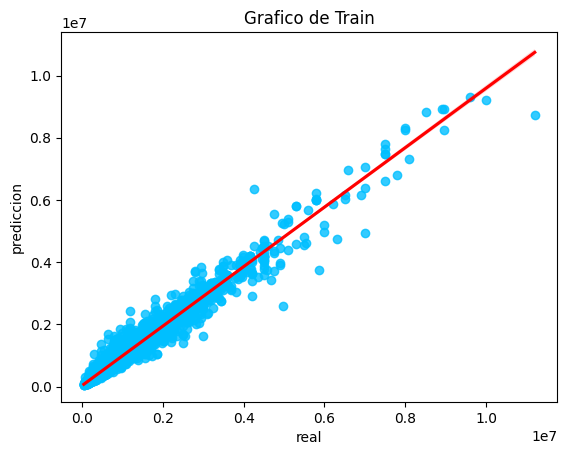

CPU times: total: 922 ms
Wall time: 946 ms


In [156]:
%%time
#grafico con los datos de train
ax = sns.regplot(x="real", y="prediccion", data=df_final_train,
                 scatter_kws={"color": "deepskyblue"}, line_kws={"color": "red"}).set(
                    title="Grafico de Train")
plt.show()

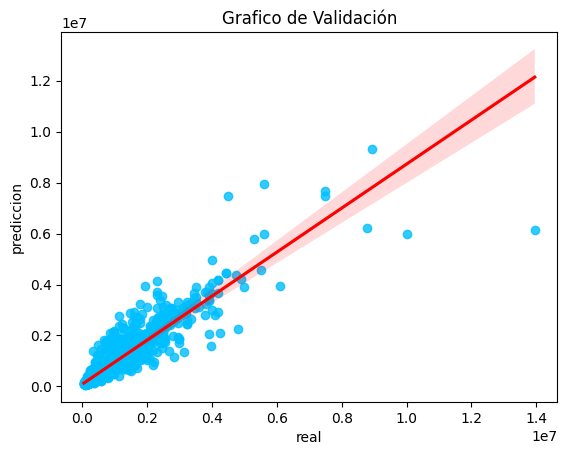

CPU times: total: 500 ms
Wall time: 499 ms


In [158]:
%%time
#grafico con los datos de validación
ax = sns.regplot(x="real", y="prediccion", data=df_final_validation, 
                 scatter_kws={"color": "deepskyblue"}, line_kws={"color": "red"}).set(
                    title="Grafico de Validación")
plt.show()

# Realizar predicciones con datos nuevos

In [159]:
#obtener registros aleatorios
X_pred = X_validation.sample(25)
X_pred.head()

,tipo,metros,ascensor,garage,distrito
12906,2,295,0,1,15
562,21,100,1,0,0
13086,5,106,0,0,15
8576,5,101,1,0,8
8449,19,105,1,1,8


In [160]:
# crea df para almacenar los valores actuales
df_prediccion = pd.DataFrame()

for i in range(len(X_pred.index.get_level_values(0))):
    #print(X_pred.index.get_level_values(0)[i])
    #lista_indices.append(X_pred.index.get_level_values(0)[i])
    #obtener el precio
    df_prediccion.loc[i, 'precio'] = data['precio'][X_pred.index.get_level_values(0)[i]]
    #obtener el tipo
    df_prediccion.loc[i, 'tipo'] = data['tipo'][X_pred.index.get_level_values(0)[i]]
    #obtener el metros
    df_prediccion.loc[i, 'metros'] = data['metros'][X_pred.index.get_level_values(0)[i]]
    #obtener el ascensor
    df_prediccion.loc[i, 'ascensor'] = data['ascensor'][X_pred.index.get_level_values(0)[i]]
    #obtener el garage
    df_prediccion.loc[i, 'garage'] = data['garage'][X_pred.index.get_level_values(0)[i]]
    #obtener el distrito
    df_prediccion.loc[i, 'distrito'] = data['distrito'][X_pred.index.get_level_values(0)[i]]
    #hacer la prediccion y obtener el precio final
    df_prediccion.loc[i, 'prediccion'] = model.predict(X_pred)[i]
    #calcular la diferencia entre el valor real y el valor de la predicción
    df_prediccion.loc[i, 'diferencia'] = df_prediccion.loc[i, 'precio'] - df_prediccion.loc[i, 'prediccion']

In [161]:
df_prediccion.head(10)

,precio,tipo,metros,ascensor,garage,distrito,prediccion,diferencia
0,850000.0,chalet,295.0,False,True,san-blas,850000.000000,0.000000
1,565000.0,planta 7,100.0,True,False,Arganzuela,471000.000000,94000.000000
2,191000.0,planta 1,106.0,False,False,san-blas,193900.000000,-2900.000000
3,285000.0,planta 1,101.0,True,False,fuencarral,384583.333333,-99583.333333
4,570000.0,planta 5,105.0,True,True,fuencarral,516500.000000,53500.000000
5,255000.0,planta 4,60.0,True,False,chamartin,360900.000000,-105900.000000
6,109995.0,bajo,30.0,False,False,tetuan,120395.000000,-10400.000000
7,249000.0,bajo,50.0,True,False,chamartin,272125.000000,-23125.000000
8,750000.0,planta 3,120.0,True,False,barrio de salamanca,819066.666667,-69066.666667
9,150000.0,planta 1,50.0,True,False,moratalaz,188700.000000,-38700.000000


In [163]:
#mostrar el DF con formato de miles y 2 decimales 
df_prediccion.head(10).style.format({'precio':'{:,.2f}', 
                                     'metros':'{:,.0f}', 
                                     'prediccion':'{:,.2f}', 
                                     'diferencia': '{:,.2f}'})

,precio,tipo,metros,ascensor,garage,distrito,prediccion,diferencia
0,"850,000.00",chalet,295,False,True,san-blas,"850,000.00",0.00
1,"565,000.00",planta 7,100,True,False,Arganzuela,"471,000.00","94,000.00"
2,"191,000.00",planta 1,106,False,False,san-blas,"193,900.00","-2,900.00"
3,"285,000.00",planta 1,101,True,False,fuencarral,"384,583.33","-99,583.33"
4,"570,000.00",planta 5,105,True,True,fuencarral,"516,500.00","53,500.00"
5,"255,000.00",planta 4,60,True,False,chamartin,"360,900.00","-105,900.00"
6,"109,995.00",bajo,30,False,False,tetuan,"120,395.00","-10,400.00"
7,"249,000.00",bajo,50,True,False,chamartin,"272,125.00","-23,125.00"
8,"750,000.00",planta 3,120,True,False,barrio de salamanca,"819,066.67","-69,066.67"
9,"150,000.00",planta 1,50,True,False,moratalaz,"188,700.00","-38,700.00"
